In [64]:
import pandas as pd
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.graph_objs as go
import os

In [65]:
cenario1 = 'C:/Users/david/OneDrive/Desktop/FERV codigo/Analise_Estatica/V1A1F2_REV2_091123/'
cenario2 = 'C:/Users/david/OneDrive/Desktop/FERV codigo/Analise_Estatica/V2A2F2_REV4_081123/'
cenario3 = 'C:/Users/david/OneDrive/Desktop/FERV codigo/Analise_Estatica/V3A3F2_REV2_091123/'

# cenario2022 = 'D:/0 FERV/0 Dados PYTHON/CASOS 2022_novos/Results/V1A1F2 FNS Lim 2022/'
cenario2022 = 'D:/0 FERV/0 Dados PYTHON/CASOS 2022_novos/Results/V1A1F2 FNS Lim 2022_corrigidos/'

cenarioMPV = 'C:/Users/david/OneDrive/Desktop/FERV codigo/Analise_Estatica/MPV_(FNS Lim)_RC/'
# V2A2F_
cenario5 ='C:/Users/David/OneDrive/Desktop/FERV codigo/Analise_Estatica/V2A2F2_RESP_FNS_lim_rev2_2026/'
cenario6 ='C:/Users/David/OneDrive/Desktop/FERV codigo/Analise_Estatica/V2A2F3_RESP_FNS_lim_rev1_2026/'
cenario7 ='C:/Users/David/OneDrive/Desktop/FERV codigo/Analise_Estatica/V2A2F4_RESP_FNS_lim_rev1_2026/'
cenario8 ='C:/Users/David/OneDrive/Desktop/FERV codigo/Analise_Estatica/V2A2F5_RESP_FNS_lim_rev1_2026/'
# V1A1F_
cenario9 ='C:/Users/David/OneDrive/Desktop/FERV codigo/Analise_Estatica/V1A1F2_RESP_FNS_lim_rev1_2026/'
cenario10 ='C:/Users/David/OneDrive/Desktop/FERV codigo/Analise_Estatica/V1A1F3_RESP_FNS_lim_rev1_2026/'
cenario11 ='C:/Users/David/OneDrive/Desktop/FERV codigo/Analise_Estatica/V1A1F4_RESP_FNS_lim_rev1_2026/'
cenario12 ='C:/Users/David/OneDrive/Desktop/FERV codigo/Analise_Estatica/V1A1F5_RESP_FNS_lim_rev1_2026/'

folderimg = 'ImagesCenarios/'

Analise_Potencia = False
Analise_Tensão = False
Analise_Shunt = True
Analise_Linhas = True
Analise_Inter_HVDC = True
Analise_Correlação = True
Analise_Cluster = True

pathscenarios = [cenario2022]
# pathscenarios = [cenario9, cenario10, cenario11, cenario12]

# EXTRACT DATA

In [66]:
# Definir una función que recibe un nombre de archivo, un valor de cenario y una lista, y devuelve la lista con el dataframe leído y modificado
def read_and_append(filename, cenario, lst):
  # Leer el archivo CSV
  df = pd.read_csv(filename)
  # Agregar la columna 'Cenario' con el valor correspondiente
  df['Cenario'] = cenario
  # Agregar el dataframe a la lista
  lst.append(df)
  # Devolver la lista
  return lst

# Crear un diccionario vacío para guardar las listas de dataframes
dfs = {}
# Llenar el diccionario con las listas vacías para cada clave
keys = ['pot_mw_mvar','pot_mw_reserv', 'pot_mvar_reserv', 'Index', 'Index_PO', 'Index_Modif', 'linhas', 'Trafo', 'intercambios', 'HVDC', 'ger', 'nt', 'ger_reg','IndexDec_PQ','IndexDec_PV','OPF_NC','PWF_NC', ]
for key in keys:
  dfs[key] = []
dirGeral = 'Data/Geral/'
dirIndice = 'Data/Indice/'
dirRamos = 'Data/Fluxo em Ramos/'
dirPotencia = 'Data/Potencia/'

# # Crear una lista de tuplas con los nombres de los archivos y las claves del diccionario
# filenames = [('MW_PO.csv', 'pot_mw'), ('MVAR_PO.csv', 'pot_mvar'), ('Reserva_MW_PO.csv', 'pot_mw_reserv'), ('ReservaMVAR_PO.csv', 'pot_mvar_reserv'),
#               ('Indice.csv', 'Index'), ('Indice_PO.csv', 'Index_PO'), ('Indice_Modif.csv', 'Index_Modif'), ('Linhas.csv', 'linhas'), ('Trafo.csv', 'Trafo'),
#               ('DF_Intercambios.csv', 'intercambios'), ('DF_HVDC.csv', 'HVDC'),  ('DF_POT_Reg.csv','ger_reg'),('Indice_DecompPQ.csv', 'IndexDec_PQ'), ('Indice_DecompPV.csv', 'IndexDec_PV'),
#               ('OPF_NC.csv', 'OPF_NC'), ('PWF_NC.csv', 'PWF_NC'),('Df_ger.csv', 'ger'), ('Df_nt.csv', 'nt'),
#               ]

# filenames = [(dirGeral + 'OPF_NC.csv', 'OPF_NC'), (dirGeral + 'PWF_NC.csv', 'PWF_NC'),(dirGeral + 'Df_ger.csv', 'ger'), (dirGeral + 'Df_nt.csv', 'nt'), (dirRamos + 'Df_Linhas.csv', 'linhas'), (dirRamos + 'Df_Trafo.csv', 'Trafo'), (dirRamos + 'DF_Intercambios.csv', 'intercambios'), (dirRamos + 'DF_HVDC.csv', 'HVDC'), (dirIndice + 'Df_DPI_S2.csv', 'Index'), (dirIndice +'Df_DPI_S4.csv', 'Index_PO'), (dirIndice + 'Df_DPI_S3.csv', 'Index_Modif'), (dirIndice +'Df_PQ_DPI_S1.csv', 'IndexDec_PQ'), (dirIndice +'Df_PV_DPI_S1.csv', 'IndexDec_PV'), (dirPotencia+'Df_MW-MVAR_PO.csv', 'pot_mw_mvar'),  (dirPotencia+'Df_Reserva_PO_MW.csv', 'pot_mw_reserv'), (dirPotencia+'Df_Reserva_PO_MVAR.csv', 'pot_mvar_reserv'),(dirPotencia+'DF_POT_Reg.csv', 'ger_reg'),
#               ]

filenames = [(dirGeral + 'Df_ger.csv', 'ger'), (dirGeral + 'Df_nt.csv', 'nt'), (dirRamos + 'Df_Linhas.csv', 'linhas'), (dirRamos + 'Df_Trafo.csv', 'Trafo'), (dirRamos + 'DF_Intercambios.csv', 'intercambios'), (dirRamos + 'DF_HVDC.csv', 'HVDC'), (dirIndice + 'Df_DPI_S2.csv', 'Index'), (dirIndice +'Df_DPI_S4.csv', 'Index_PO'), (dirIndice + 'Df_DPI_S3.csv', 'Index_Modif'), (dirIndice +'Df_PQ_DPI_S1.csv', 'IndexDec_PQ'), (dirIndice +'Df_PV_DPI_S1.csv', 'IndexDec_PV'), (dirPotencia+'Df_MW-MVAR_PO.csv', 'pot_mw_mvar'),(dirPotencia+'DF_POT_Reg.csv', 'ger_reg'),
              ]

dic_cenarios = {'V1A1F2_REV2_091123':'Cenario Baixa', 'V2A2F2_REV4_081123':'Cenario Média', 'V3A3F2_REV2_091123':'Cenario Alta', 
              'MPV_(FNS Lim)_RC': 'Cenario MPV', 'V2A2F2_RESP_FNS_lim_rev2_2026':'Cenario Media F2', 'V2A2F3_RESP_FNS_lim_rev1_2026':'Cenario Media F3',
              'V2A2F4_RESP_FNS_lim_rev1_2026':'Cenario Media F4', 'V2A2F5_RESP_FNS_lim_rev1_2026':'Cenario Media F5',
              'V1A1F2_RESP_FNS_lim_rev1_2026':'Cenario Baixa F2', 'V1A1F3_RESP_FNS_lim_rev1_2026':'Cenario Baixa F3',
              'V1A1F4_RESP_FNS_lim_rev1_2026':'Cenario Baixa F4', 'V1A1F5_RESP_FNS_lim_rev1_2026':'Cenario Baixa F5',
              'V1A1F2 FNS Lim 2022':'Cenario 2022','V1A1F2 FNS Lim 2022_corrigidos':'Cenario 2022'
              }

for path in pathscenarios:
  # Determinar el valor de la variable cenario según el nombre del directorio
  cenario = dic_cenarios[path.split('/')[-2]]
  # Iterar sobre los elementos de la lista filenames
  for filename, key in filenames:
    # Llamar a la función read_and_append con el nombre del archivo, el valor de cenario y la lista correspondiente del diccionario
    dfs[key] = read_and_append(path + filename, cenario, dfs[key])

intense_palette = sns.color_palette("bright", 10)  # You can adjust the number of colors as needed
namescenarios = {
    'Cenario Baixa': ['L.H Scenario', intense_palette[0]],
    'Cenario Média': ['M.H Scenario', intense_palette[1]],
    'Cenario Alta': ['H.H Scenario', intense_palette[2]],
    'Cenario MPV': ['MPV Scenario', intense_palette[3]],
    'Cenario 2022': ['Cenario 2022', intense_palette[3]],
    'Cenario Media F2': ['M.H Scenario F2', intense_palette[4]],
    'Cenario Media F5': ['M.H Scenario F5', intense_palette[5]],
    'Cenario Media F3': ['M.H Scenario F3', intense_palette[6]],
    'Cenario Media F4': ['M.H Scenario F4', intense_palette[7]],  # Adjusted to match palette size

    'Cenario Baixa F2': ['L.H Scenario F2', intense_palette[0]],
    'Cenario Baixa F3': ['L.H Scenario F3', intense_palette[1]],
    'Cenario Baixa F4': ['L.H Scenario F4', intense_palette[2]],
    'Cenario Baixa F5': ['L.H Scenario F5', intense_palette[8]]  # Adjusted to match palette size

}

label_dict = {'Cenario Baixa':'L.H Scenario', 'Cenario Média':'M.H Scenario', 
                 'Cenario Alta':'H.H Scenario','Cenario MPV': 'MPV Scenario',
                 'Cenario Media F2':'M.H Scenario F2','Cenario Media F5': 'M.H Scenario F5',
                 'Cenario Media F3':'M.H Scenario F3','Cenario Media F4': 'M.H Scenario F4',
                 'Cenario 2022': 'Cenario 2022',
                 }

# Relatorio Convergencia

In [11]:
# print ('Casos Não Convergidos no OPF: ' + str(pd.concat(dfs['OPF_NC'], axis=0).shape))
# print ('Casos Não Convergidos no PWF: ' + str(pd.concat(dfs['PWF_NC'], axis=0).shape))

# indice = pd.concat(dfs['Index_PO'], axis=0)
# print('Casos Inseguro: ' + str(indice[indice['DPI_PO_final']>1].shape))
# print('Casos em alarme: ' + str(indice[(indice['DPI_PO_final']<=1) & (indice['DPI_PO_final']>0)].shape))

# indice1 = pd.concat(dfs['Index_Modif'], axis=0)
# print(indice1[indice1['PV_lower']>1].shape)
# print(indice1[indice1['PQ_lower']>1].shape)
# print(indice1[indice1['PQ_upper']>1].shape)
# print(indice1[indice1['PV_upper']>1].shape)

# Definição de Funções e Dataframe Importantes

In [67]:
def filtarNC(df):
    df_NC = pd.concat(dfs['Index_PO'], axis=0)
    df_fiiltrado = []
    for df_ in df:
        cenario = df_['Cenario'][0]
        bool_PWF_NConv = df_NC[df_NC['Cenario']==cenario][['Dia', 'Hora']].apply(tuple, axis=1)
        filtro = (df_[['Dia', 'Hora']].apply(tuple, axis=1).isin(bool_PWF_NConv))
        df_filt = df_[filtro]
        df_fiiltrado.append(df_filt)
    return df_fiiltrado

def plot_perfil_pot(df, columna, ylbl, titulo, ylim = None, day = False, variavel = None, otherplot = False):
    # Crear el gráfico
    fig, ax = plt.subplots(figsize=(20, 7))
    
    for idx in range(len(df)):
        if variavel == None:
            cenario = df[idx]['Cenario'].iloc[0]
        else:
            cenario = df[idx][variavel].iloc[0]
        if (columna == 'PL_MW') | (columna == 'Demanda_Liquida'):
            plt.plot(range(len(df[idx])), df[idx][columna], label=namescenarios[cenario][0], color=namescenarios[cenario][1])
        else:
            plt.plot(df[idx].index, df[idx][columna], label=namescenarios[cenario][0], color=namescenarios[cenario][1])

    # Ajustar la leyenda y las etiquetas del gráfico
    plt.legend(title='Scenario')
    plt.title(titulo)
    plt.xlabel('Operation Point',fontsize=15)
    plt.ylabel(ylbl, fontsize=15)
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    # Adding x-axis with discretization of 50 points
    ax.xaxis.set_major_locator(plt.MaxNLocator(12))
    if day:
        # Adding another x-axis showing days
        days = ['Day {}'.format(i+1) for i in range(28)]
        plt.xticks(ticks=[i*48 for i in range(28)], labels=days, rotation=45)
        plt.xlabel('',fontsize=10)
    plt.grid('-',lw = 0.4, alpha=0.50)
    if ylim != None:
        plt.ylim(ylim)
    nome = folderimg+titulo+'.svg'
    # plt.savefig(nome)
    if otherplot == False:
        plt.show()

def distribution_plot(df, columna, xlbl, titulo, variavel = None):

    plt.figure(figsize=(12, 6))
    for dff in df:
        if variavel == None:
            cenario = dff['Cenario'].iloc[0]
        else:
            cenario = dff[variavel].iloc[0]
        sns.histplot(dff[columna], kde=True, label=namescenarios[cenario][0], color=namescenarios[cenario][1], bins=30, multiple="stack",alpha=0.70, element='bars',)
        plt.axvline(dff[columna].mean(), color=namescenarios[cenario][1], linestyle='dashed', linewidth=1.2)
        print(dff[columna].mean())

    plt.title(titulo, fontsize=18)
    plt.xlabel(xlbl, fontsize=15)
    plt.ylabel('Frequency', fontsize=15)
    plt.tick_params(axis='both', labelsize=12)
    plt.legend(loc='best', fontsize = 15)
    nome = folderimg+titulo+'.svg'
    # plt.savefig(nome)
    plt.show()

def distribution_plot_reg(df, columna, reg, xlbl, titulo):
    
    plt.figure(figsize=(12, 6))

    for df_ in df:
        dff = df_[df_['REG'] == reg]
        cenario = dff['Cenario'].iloc[0]
        sns.histplot(dff[columna], kde=True, label=namescenarios[cenario][0], color=namescenarios[cenario][1], bins=30, multiple="stack",alpha=0.70, element='bars',)
        plt.axvline(dff[columna].mean(), color=namescenarios[cenario][1], linestyle='dashed', linewidth=1.2)
        print(dff[columna].mean())


    plt.title(titulo, fontsize=18)
    plt.xlabel(xlbl, fontsize=15)
    plt.ylabel('Frequency', fontsize=15)
    plt.tick_params(axis='both', labelsize=12)
    plt.legend(loc='best', fontsize = 15)
    nome = folderimg+titulo+'.svg'
    # plt.savefig(nome)
    plt.show()

def custom_autopct(pct, valores):
    # return f"{pct:.1f}%\n({float(pct/100 * sum(valores)):.2f}TWh)"
    return f"{pct:.1f}%"

def pieplot(etiquetas, valores, explode, title):
    colores = ["#4169E1", "#FF6347", "#90EE90", "#4B0082", "#FFA500", "#FFC0CB"]
    # Create the pie chart
    plt.figure(figsize=(8, 8))  # Adjust figure size
    plt.pie(valores, labels=etiquetas, colors=colores, autopct=lambda pct: custom_autopct(pct, valores), explode=explode,
            wedgeprops=dict(width=0.7, edgecolor='w'))  # Adjust slice width and edge color

    # Title and Legend
    plt.title("Generated Energy in the month - " + title, fontsize=16)  # Customize title
    plt.legend(etiquetas, loc="best")
    plt.axis('equal')  # Equal aspect ratio ensures a circular chart
    # Display the chart
    plt.show()

def boxplot_HVDC_interc(df, clase, yvalue, titulo, xlbl, ylbl, ylim = None):
    df = df.reset_index()
    # df["Cenario"] = df["Cenario"].map(label_dict)
    
    plt.figure(figsize=(10, 6))
    boxplot = sns.boxplot(data=df, x=clase, y=yvalue, hue="Cenario", width=.9, linewidth=1, gap=.1, palette = "Set1")
    # Add custom x-axis labels
    # custom_labels = ['AC-RO','Northeast', 'North', 'SE-CW', 'South']
    # boxplot.set_xticklabels(custom_labels)

    plt.title(titulo, fontsize=18)
    plt.xlabel(xlbl, fontsize=15)
    plt.ylabel(ylbl, fontsize=15)
    plt.tick_params(axis='both', labelsize=12)
    # plt.legend(title='Cenários', bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.legend(title='Scenarios', loc='best')
    if ylim !=  None:
        plt.ylim(ylim)
    # nome = folderimg+'Linhas/' + titulo+'.svg'
    # plt.savefig(nome)
    plt.show()

def boxplot_linhas(df, clase, yvalue, titulo, xlbl, ylbl, ylim = None):
    df = df.reset_index()
    # df["Cenario"] = df["Cenario"].map(label_dict)
    plt.figure(figsize=(10, 6))
    boxplot = sns.boxplot(data=df, x=clase, y=yvalue, hue="Cenario", width=.9, linewidth=1, gap=.1, palette = "Set1")
    # Add custom x-axis labels
    # custom_labels = ['AC-RO','Northeast', 'North', 'SE-CW', 'South']
    # boxplot.set_xticklabels(custom_labels)

    plt.title(titulo, fontsize=18)
    plt.xlabel(xlbl, fontsize=15)
    plt.ylabel(ylbl, fontsize=15)
    plt.tick_params(axis='both', labelsize=12)
    # plt.legend(title='Cenários', bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.legend(title='Scenarios', loc='best')
    if ylim !=  None:
        plt.ylim(ylim)
    nome = folderimg+'Linhas/' + titulo+'.svg'
    # plt.savefig(nome)
    plt.show()

def histplot_linhas(df, clase, yvalue, titulo, xlbl, ylbl, ylim = None):
    df = df.reset_index()
    # df["Cenario"] = df["Cenario"].map(label_dict)
    
    plt.figure(figsize=(12, 6))
    # sns.histplot(data=df, x=yvalue, hue=clase, kde=True, bins=20 ,alpha=0.75, element='bars', palette = "Set1",multiple="stack")
    sns.histplot(data=df, x=yvalue, hue=clase, kde=True, bins=20 ,alpha=0.75, element='bars', palette = "Set1",)
    plt.axvline(df[yvalue].mean(), color='black', linestyle='dashed', linewidth=1.2)
    plt.title(titulo, fontsize=18)
    plt.xlabel(ylbl, fontsize=15)
    plt.ylabel('Frequency', fontsize=15)
    plt.tick_params(axis='both', labelsize=12)
    # plt.legend(title='Scenarios')
    if ylim !=  None:
        plt.ylim(ylim)
    nome = folderimg+'Linhas/' + titulo+'.svg'
    # plt.savefig(nome)
    plt.show()

def scatterplot(df, v1, v2,v3 = None, xlimites = None, namedir = None):
    # Set the figure size
    plt.figure(figsize=(10, 6))
    # Create the scatterplot
    if v3 == None:
        scatter = sns.scatterplot(data=df, x=v1, y=v2, s=60, legend=None)
    else:
        scatter = sns.scatterplot(data=df, x=v1, y=v2, palette='rainbow', hue=v3, s=60, legend=None)
        norm = mcolors.Normalize(vmin=df[v3].min(), vmax=df[v3].max())
        sm = plt.cm.ScalarMappable(cmap="rainbow", norm=norm)
        sm.set_array([])
        # Create colorbar and increase font size
        cbar = plt.colorbar(sm, ax=scatter, orientation='vertical', label=v3)


    # Show the plot
    plt.grid(True, which="both", linestyle='--', linewidth=0.5)
    nometitulo = f'{namedir} Scatter plot of {v2} vs {v1}'.replace(':',' ')
    plt.title(nometitulo, fontsize = 15)
    plt.xlabel(v1, fontsize = 11)
    plt.ylabel(v2, fontsize = 11)
    if xlimites != None:
        plt.xlim(xlimites)
    if namedir != None:
        nome = folderimg+'Correlações/' + namedir + nometitulo + '.svg'
        # plt.savefig(nome)
        nome = folderimg+'Correlações/' + namedir + nometitulo + '.png'
        # plt.savefig(nome)

    plt.show()

    correlation = df[v1].corr(df[v2])
    print(f"Indice de Correlación: {correlation}")


In [74]:
def boxplot_voltage(df, clase, titulo, xlbl, ylim = None):

    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=clase, y="MODV_PU", hue="Cenario", width=.9, linewidth=1, gap=.1, palette = "Set1")
    plt.title(titulo, fontsize=18)
    plt.xlabel(xlbl, fontsize=15)
    plt.ylabel('Tensão (pu)', fontsize=15)
    plt.tick_params(axis='both', labelsize=12)
    plt.legend(title='Cenários', bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.axhline(1.10, color='red', linestyle='--' ,  alpha=0.9)
    plt.axhline(0.90, color='red', linestyle='--' ,  alpha=0.9)
    if ylim !=  None:
        plt.ylim(ylim)
    plt.show()

def plot_indice (df_data, eje_y, name, title, INDICE, xlimites=None,ylimites=None, order = False, ax=None):
    
    if ax is None:
        fig, axs = plt.subplots(nrows=1, figsize=(10, 6), sharex=False)
    else:
        axs = ax

    colores = [sns.color_palette("Paired")[5], sns.color_palette("Paired")[1], sns.color_palette("Paired")[3]]
    # for idx, cenario in enumerate(['Cenario Baixa','Cenario Média','Cenario Alta']):      
    #     if order:
    #         data = df_data.loc[:, :, cenario].sort_values(INDICE, ascending=False)[INDICE]
    #         data_points_per_day = 10
    #         num_days = (len(df_data))*data_points_per_day / 100
    #         axs.set_xticks([round(i * num_days) for i in range(data_points_per_day+1)])
    #         axs.set_xticklabels([f'{i*10}' for i in range(data_points_per_day+1)], fontsize=12, rotation=0, ha='center')
    #         axs.set_xlabel('Percentage of half hours in a month (%)', fontsize=23)
    #     else:
    #         data = df_data.loc[:, :, cenario][INDICE]
    #         axs.set_xlabel('Operating Points', fontsize=23)
        
    #     axs.plot(data.values, color=colores[idx], label=cenario, lw=2, linestyle='-')

     
    if order:
        data = df_data.sort_values(INDICE, ascending=False)[INDICE]
        data_points_per_day = 10
        num_days = (len(df_data))*data_points_per_day / 100
        axs.set_xticks([round(i * num_days) for i in range(data_points_per_day+1)])
        axs.set_xticklabels([f'{i*10}' for i in range(data_points_per_day+1)], fontsize=12, rotation=0, ha='center')
        axs.set_xlabel('Percentage of half hours in a month (%)', fontsize=23)
    else:
        data = df_data[INDICE]
        axs.set_xlabel('Operating Points', fontsize=23)
    
    area_trapezoidal = np.trapz(data.values)/len(data)
    media = np.mean(data.values)
    axs.plot(data.values, color=colores[1], label='Todos os Cenarios', lw=2, linestyle='-')
        
    axs.legend(loc='upper right', fontsize=18)
    axs.tick_params(axis='y', labelsize=24)
    axs.tick_params(axis='x', labelsize=24)
    axs.set_ylabel(eje_y, fontsize=22)
    axs.set_title(f'{title} normalized area/mean: {area_trapezoidal, media}', fontsize=15)
    if xlimites is not None:
        axs.set_xlim(xlimites)
    if ylimites is not None:
        axs.set_ylim(ylimites)
    axs.grid(True, linestyle='-', linewidth=1.2, alpha=0.4)
    plt.tight_layout()
    if ax is None:
        plt.show()
    return area_trapezoidal

def plot_indice_reg(df_data, eje_y, name, title, INDICE, xlimites=None, ylimites=None, order=False, ax=None):

    if ax is None:
        fig, axs = plt.subplots(nrows=1, figsize=(10, 6), sharex=False)
    else:
        axs = ax

    colores = [sns.color_palette("Paired")[1], sns.color_palette("Paired")[3], sns.color_palette("Paired")[5],sns.color_palette("Paired")[7],sns.color_palette("Paired")[9]]
    region_map = {'Nordeste':'Northeast', 'Norte':'North', 'Sudeste-Centro-Oeste':'SE-CW', 'Sul':'South','AC-RO':'AC-RO'}
    for idx, regiao in enumerate(['Norte','Nordeste','Sudeste-Centro-Oeste', 'Sul', 'AC-RO']):
        if order:
            data = df_data.loc[:, :, regiao].sort_values(INDICE, ascending=False)[INDICE]
            data_points_per_day = 10
            num_days = (len(df_data)/5)*data_points_per_day / 100
            axs.set_xticks([round(i * num_days) for i in range(data_points_per_day+1)])
            axs.set_xticklabels([f'{i*10}' for i in range(data_points_per_day+1)], fontsize=12, rotation=0, ha='center')
            axs.set_xlabel('Percentage of half hours in a month (%)', fontsize=23)
        else:
            data = df_data.loc[:, :, regiao][INDICE]
            axs.set_xlabel('Operating Points', fontsize=23)
        
        axs.plot(data.values, color=colores[idx], label=region_map[regiao], lw=2, linestyle='-')
        
    axs.legend(loc='upper right', fontsize=18)
    axs.tick_params(axis='y', labelsize=24)
    axs.tick_params(axis='x', labelsize=24)
    axs.set_ylabel(eje_y, fontsize=22)
    axs.set_title(title, fontsize=22)
    if xlimites is not None:
        axs.set_xlim(xlimites)
    if ylimites is not None:
        axs.set_ylim(ylimites)
    axs.grid(True, linestyle='-', linewidth=1.2, alpha=0.4)
    plt.tight_layout()
    if ax is None:
        plt.show()

def plot_indice_perfil(df_resultado, df_data, column, ylim = None, markers=True,):

    df = df_resultado.merge(df_data,on=['Dia','Hora', 'Cenario'], how='left')
    df = df[['Dia_Hora','Cenario' ,  column]]

    # Plotting
    plt.figure(figsize=(20, 7))
    # sns.lineplot(data=F_ONS_melted, x='Dia_Hora', y='value', hue='Fluxos', style='Fluxos', markers=True)
    sns.lineplot(data=df, x='Dia_Hora', y=column, hue='Cenario', style='Cenario', markers=markers)
    plt.xlabel('(Dia, Hora)', fontsize = 15)
    plt.ylabel('(Indice de Tensão)', fontsize = 15)
    plt.title(f'Voltage Violation Index - {column}', fontsize = 15)

    value = int(df['Dia_Hora'].unique().shape[0]/(28))
    selected_ticks = df['Dia_Hora'].iloc[::value]  # Change the step value as needed

    plt.xticks(selected_ticks, rotation=45, fontsize=12)
    plt.tick_params(axis='y', labelsize=12)
    # plt.xlim(selected_ticks.iloc[0], selected_ticks.iloc[-1])
    plt.legend(title='Cenarios', fontsize = 12)
    # Agregar la línea horizontal en el valor cero del eje y
    plt.axhline(1, color='red', linestyle='--' ,  alpha=0.9)
    if ylim != None:
        plt.ylim(ylim)
    plt.tight_layout()
    plt.grid()
    plt.show()

def plot_potencia_perfil(df_resultado, df_data, column, ylim = None, markers=True,):

    df = df_resultado.merge(df_data,on=['Dia','Hora', 'Cenario'], how='left')

    # # Merge the dataframes
    # df['PL_MW'] = df['PL_MW_x'].combine_first(df['PL_MW_y'])
    # # Drop the unnecessary columns
    # df.drop(['PL_MW_x', 'PL_MW_y'], axis=1, inplace=True)

    # Plotting
    plt.figure(figsize=(20, 7))
    # sns.lineplot(data=F_ONS_melted, x='Dia_Hora', y='value', hue='Fluxos', style='Fluxos', markers=True)

    sns.lineplot(data=df, x='Dia_Hora', y=column, hue='Cenario', style='Cenario', markers=markers)
    plt.xlabel('(Dia, Hora)', fontsize = 15)
    plt.ylabel('(MW)', fontsize = 15)
    if column == 'DemandaLiquida':
        plt.title(f'Demanda Liquida Total do Sistema', fontsize = 15)
    else:
        plt.title(f'Perfil de Potencia de {column}', fontsize = 15)

    value = int(df['Dia_Hora'].unique().shape[0]/(28))
    selected_ticks = df['Dia_Hora'].iloc[::value]  # Change the step value as needed
    
    plt.xticks(selected_ticks, rotation=45, fontsize=12)
    plt.tick_params(axis='y', labelsize=12)
    plt.legend(title='Cenarios', fontsize = 12)
    if ylim != None:
        plt.ylim(ylim)
    plt.tight_layout()
    plt.grid()
    plt.show()
    
    # return df
    
def plot_potencia_perfil_2(df_resultado, df_data, column1, column2, ylim=None, ylim2=None, markers=True):

    df = df_resultado.merge(df_data, on=['Dia','Hora', 'Cenario'], how='left')

    plt.figure(figsize=(20, 7))
    ax1 = plt.gca()  # get current axes

    sns.lineplot(data=df, x='Dia_Hora', y=column1, ax=ax1, label = column1)
    # sns.lineplot(data=df, x='Dia_Hora', y=column1, hue='Cenario', style='Cenario', markers=markers, label = column1)
    plt.xlabel('(Dia, Hora)', fontsize=15)
    plt.ylabel(column1, fontsize=15, color =  'blue')

    value = int(df['Dia_Hora'].unique().shape[0] / 28)
    selected_ticks = df['Dia_Hora'].iloc[::value]  # Change the step value as needed

    plt.xticks(selected_ticks, rotation=45, fontsize=12)
    plt.tick_params(axis='y', labelsize=12)
    plt.legend(loc='upper left', fontsize=12)
    plt.grid(alpha = 1)

    if ylim is not None:
        plt.ylim(ylim)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    # Assuming you have another column named 'another_column' in df_data dataframe
    sns.lineplot(data=df, x='Dia_Hora', y=column2, ax=ax2, color='red', label = column2)  
    # sns.lineplot(data=df, x='Dia_Hora', y=column2, hue='Cenario', style='Cenario', markers=markers, label = column2)
    ax2.set_ylabel(column2, fontsize=15, color =  'red')  # we already handled the x-label with ax1
    ax2.tick_params(axis='y', labelsize=12)
    plt.legend(loc='upper right', fontsize=12)
    # plt.grid(axis='y', alpha = 0.5)

    if ylim2 is not None:
        plt.ylim(ylim2)

    plt.tight_layout()
    
    plt.show()

def stacklineplot (df, scenario):

    df.reset_index(inplace=True)
    # Create traces for each power source
    traces = []
    cumulative_sum = 0
    for column in df.columns[2:]:  # Exclude 'Dia' and 'Hora' columns
        trace = go.Scatter(
            x=df.index,  # Assuming 'Hora' is the time column
            y=df[column] + cumulative_sum,
            mode='lines',
            name=column.split('_')[-1],  # Extract the power source name
            opacity=0.8,
            fill='tonexty',
            hoverinfo='x+y'  # Show both x and y values when hovering
        )
        traces.append(trace)
        cumulative_sum += df[column]

    # Create the plot
    fig = go.Figure(traces)

    # Update layout
    fig.update_layout(
        title="Power Generation by Source for " + scenario,
        xaxis_title="Time",
        yaxis_title="Power Generation",
        legend_title="Power Source",
        plot_bgcolor='white',
        width=1200,  # Width of the figure in pixels
        height=600,  # Height of the figure in pixels
    )

    # Display the plot
    fig.show()

    

In [77]:
from datetime import datetime, timedelta
# =======================================Dataframe Mask========================================================
fechas = [dia for dia in range(1, 29)]
semihoras_dia = [(datetime(2022, 10, dia, 0, 0) + timedelta(minutes=30*i)).strftime('%d-%H-%M') for dia in fechas for i in range(48)]
df = pd.DataFrame({'Dia_Hora': semihoras_dia})
# Dividir la columna Dia_Hora en dos partes y asignarlas a nuevas columnas
df[['Dia', 'Hora']] = df['Dia_Hora'].str.split('-', n=1, expand=True)
df['Dia_Hora'] = df['Dia_Hora'].str.replace('-',', ', n=1)
df['Dia'] = df['Dia'].astype(int)

df_copias = [df] * len(pathscenarios)
df_resultado = pd.concat(df_copias, ignore_index=True)
df_resultado['Dia'] = df_resultado['Dia'].astype(int)
scenarios_list = [dic_cenarios[path.split('/')[-2]] for path in pathscenarios]
scenarios_column = [scenario  for scenario in scenarios_list for _ in range(1344) ]
df_resultado['Cenario'] = scenarios_column
# ==============================================================================================================
df_IndicePO = pd.concat(dfs['Index_PO'], axis=0)
df_ger = pd.concat(dfs['ger'], axis=0)
df_nt = pd.concat(dfs['nt'], axis=0)
df_ger_reg = filtarNC(dfs['ger_reg'])
df_ger_reg_concat = pd.concat(df_ger_reg, axis=0)
DFF_POT = df_ger_reg_concat.drop(columns='REG').groupby(by=['Dia', 'Hora', 'Cenario']).sum()
DFF_POT_REG = df_ger_reg_concat.set_index(['Dia','Hora','REG','Cenario'])

In [71]:
scenarios_list

['Cenario 2022']

# Potência e Reserva

In [15]:
# pd.read_csv('C:/Users/David/OneDrive/Documents/demanda_liquida_SIN.csv', sep=';')
# df_nt[df_nt['Cenario']=='Cenario Media F2'].groupby(by = ['Dia','Hora'])['PL_MW'].sum().plot()
# df = DFF_POT.reset_index()
# plot_perfil_pot([df[df['Cenario']=='Cenario MPV']], columna='PL_MW', ylbl='P (MW)', titulo='Perfil de Geração Potencia Ativa (MW)', day=True)

In [16]:
# df = DFF_POT.reset_index()
# plot_perfil_pot([df[df['Cenario']=='Cenario Media F3']], columna='PL_MW', ylbl='P (MW)', titulo='Perfil de Geração Potencia Ativa (MW)', day=True)

In [17]:
if Analise_Potencia:
    df_pot_mw_filt = filtarNC(dfs['pot_mw'])
    plot_perfil_pot(df_pot_mw_filt, columna='PG_MW', ylbl='P (MW)', titulo='Perfil de Geração Potencia Ativa (MW)', day=True)
    df_pot_mvar_filt = filtarNC(dfs['pot_mvar'])
    plot_perfil_pot(df_pot_mvar_filt, columna='QG_MVAR', ylbl='Q (MVAR)', titulo='Perfil de Geração Potencia Reativa (MVAR)', day=True)

In [18]:
if Analise_Potencia:
    distribution_plot(df_pot_mw_filt,'PG_MW', '(MW)', 'Distribução MW Gerado nos Cenários')
    # distribution_plot(dfs['pot_mvar'],'QG_MVAR', 'Qg (Mvar)', 'Distribução MVAR Gerado nos Cenários')
    distribution_plot(df_pot_mvar_filt,'QG_MVAR', '(Mvar)', 'Distribução MVAR Gerado nos Cenários')
    # distribution_plot(dfs['pot_mw_reserv'],' Reserve', 'Reserve (MW)', 'Distribução MW Reserva nos Cenários')
    df_mw_reserv = filtarNC(dfs['pot_mw_reserv'])
    distribution_plot(df_mw_reserv,' Reserve', 'Reserve (MW)', 'Distribução MW Reserva nos Cenários')
    df_pot_mvar_reserv = filtarNC(dfs['pot_mvar_reserv'])
    distribution_plot(df_pot_mvar_reserv,'ReservaIND', 'Reserve (MVVAR)', 'Distribução MVAR Reserva nos Cenários')
    distribution_plot(df_pot_mvar_reserv,'ReservaCAP', 'Reserve (MVVAR)', 'Distribução MVAR Reserva nos Cenários')

In [19]:
regiones = ['Norte', 'Nordeste', 'Sudeste-Centro-Oeste', 'Sul', 'AC-RO']

if Analise_Potencia:
    for reg in regiones:
        # distribution_plot_reg(dfs['ger_reg'], 'PG_MW', reg, 'Potencia Gerada (MW)', f'Potencia Ativa Gerado no {reg} para cada Cenário')
        # distribution_plot_reg(dfs['ger_reg'], 'PL_MW', reg, 'Potencia Consumida (MW)', f'Demanda Ativa no {reg} para cada Cenário')

        distribution_plot_reg(df_ger_reg, 'PG_MW', reg, '(MW)', f'Potencia Ativa Gerado no {reg} para cada Cenário')

        # distribution_plot_reg(df_ger_reg, 'PL_MW', reg, '(MW)', f'Demanda Ativa no {reg} para cada Cenário')


In [20]:
if Analise_Potencia:
    for reg in regiones:
        # distribution_plot_reg(dfs['ger_reg'], 'QG_MVAR', reg, 'Potencia Gerada (MVAR)', f'Potencia Reativa Gerado no {reg} para cada Cenário')
        # distribution_plot_reg(dfs['ger_reg'], 'QL_MVAR', reg, 'Potencia Consumida (MVAR)', f'Demanda Reativa no {reg} para cada Cenário')
        distribution_plot_reg(df_ger_reg, 'QG_MVAR', reg, '(MVAR)', f'Potencia Reativa Gerado no {reg} para cada Cenário')
        # distribution_plot_reg(df_ger_reg, 'QL_MVAR', reg, 'Potencia Consumida (MVAR)', f'Demanda Reativa no {reg} para cada Cenário')

    # for reg in regiones:
    #     distribution_plot_reg(df_ger_reg, 'ReservaIND', reg, 'Reserva (MVAR)', f'Reserva Indutiva {reg} para cada Cenário')
    #     distribution_plot_reg(df_ger_reg, 'ReservaCAP', reg, 'Reserva (MVAR)', f'Reserva Capacitiva {reg} para cada Cenário')

# Composição da Geração

In [76]:
scenarios = DFF_POT.index.get_level_values('Cenario').unique()
for scenario in scenarios:
    objt = DFF_POT.loc[:,:,scenario][['PG_SOL','PG_BIO','PG_EOL','PG_UHE', 'PG_UTE',]].sum()*0.5 #/1000000TWh
    labels = objt.index
    values = objt.values
    data = DFF_POT.loc[:,:,scenario][['PG_UHE', 'PG_UTE', 'PG_SOL','PG_BIO','PG_EOL',]]
    # pieplot(labels,values, (0, 0, 0.0, 0, 0), scenario)
    stacklineplot (data, scenario)

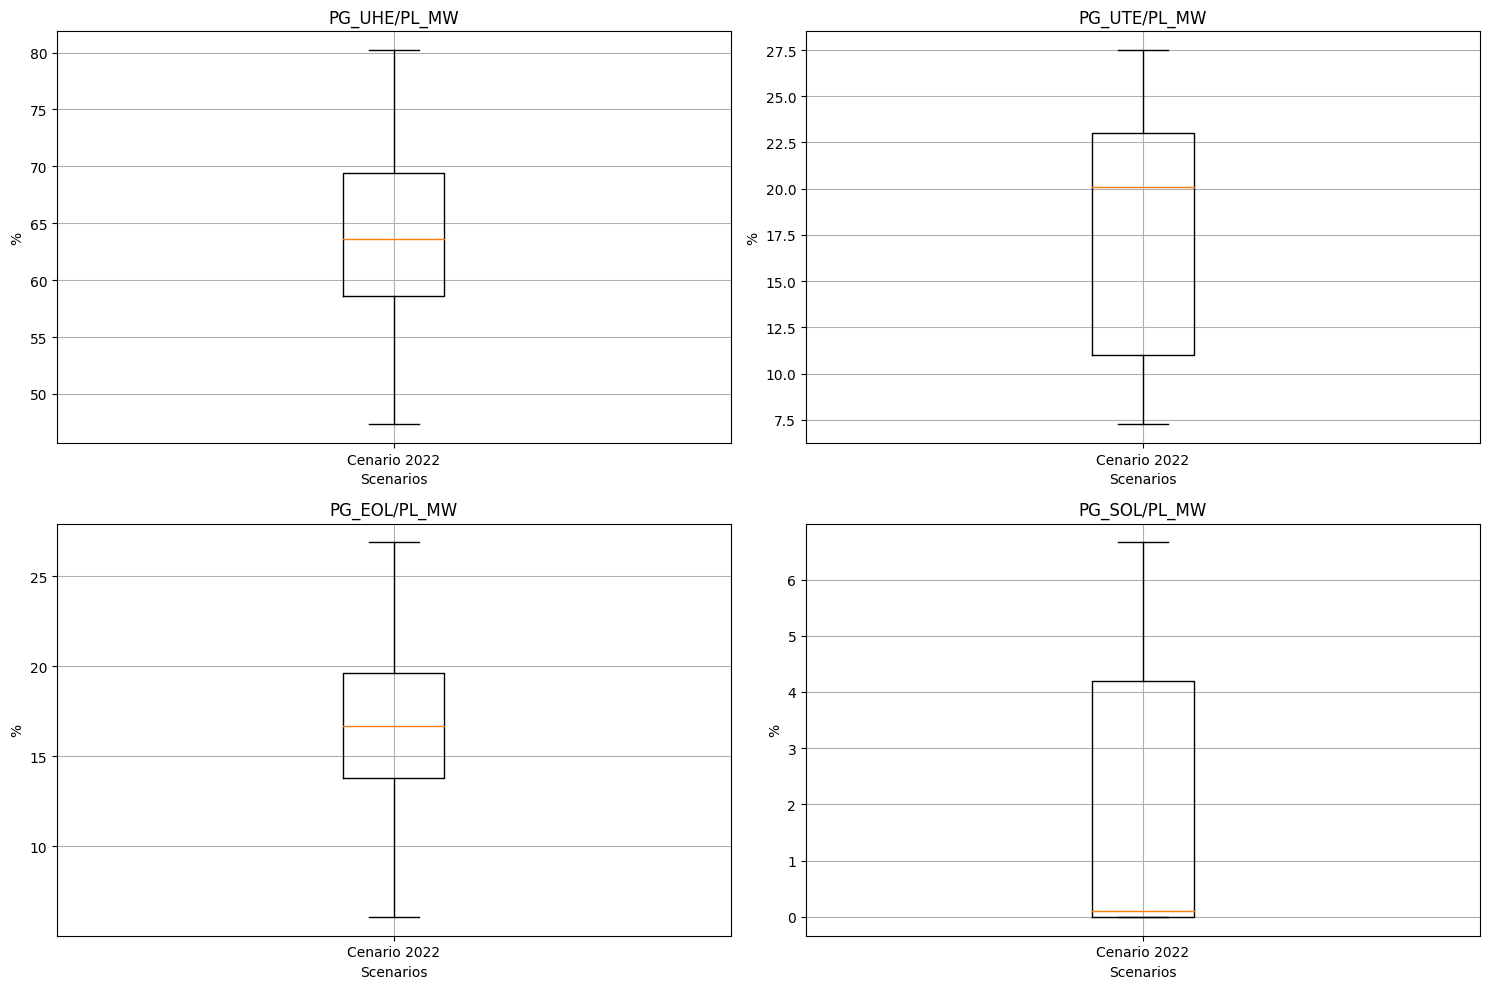

In [22]:
# DFF_POT= DFF_POT.sort_index(level='Cenario', key=lambda x: x.map({'Cenario Média': 1, 'Cenario Media F2': 2, 'Cenario Media F5': 3}))
DFF_POT= DFF_POT.sort_index(level='Cenario', key=lambda x: x.map({'Cenario Baixa': 1, 'Cenario Média': 2, 'Cenario Alta': 3}))
scenarios = DFF_POT.index.get_level_values('Cenario').unique()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for idx, column in enumerate(['PG_UHE', 'PG_UTE', 'PG_EOL', 'PG_SOL']):
    data_to_plot = []
    for scenario in scenarios:
        dff = DFF_POT.loc[:, :, scenario]
        data_to_plot.append(dff[column] / dff['PL_MW']*100)
    ax = axes[idx//2, idx%2]
    ax.boxplot(data_to_plot, labels=scenarios)
    ax.set_title(f"{column}/PL_MW")
    ax.set_xlabel("Scenarios")
    ax.set_ylabel('%')
    ax.grid(True)

plt.tight_layout()
plt.show()


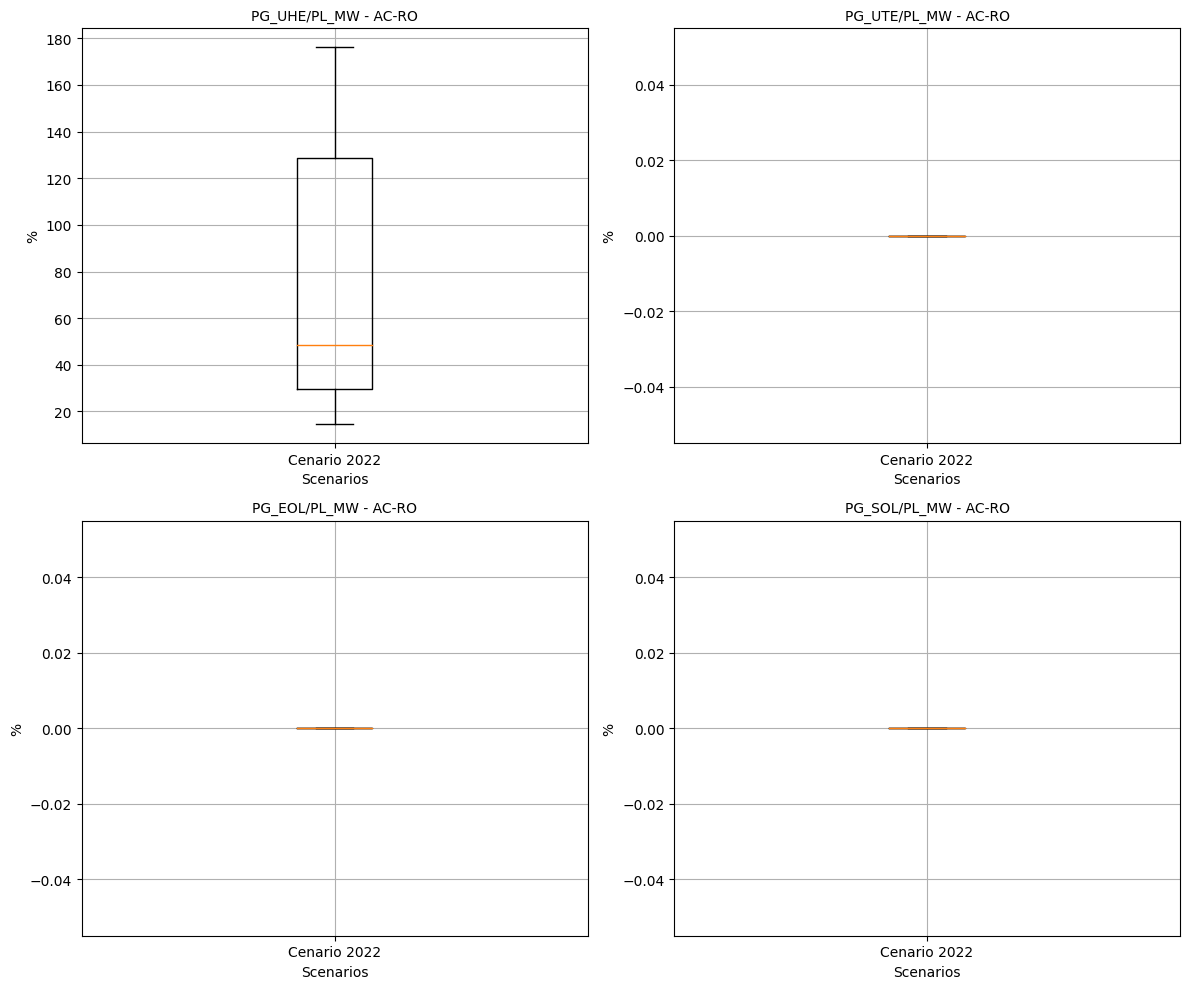

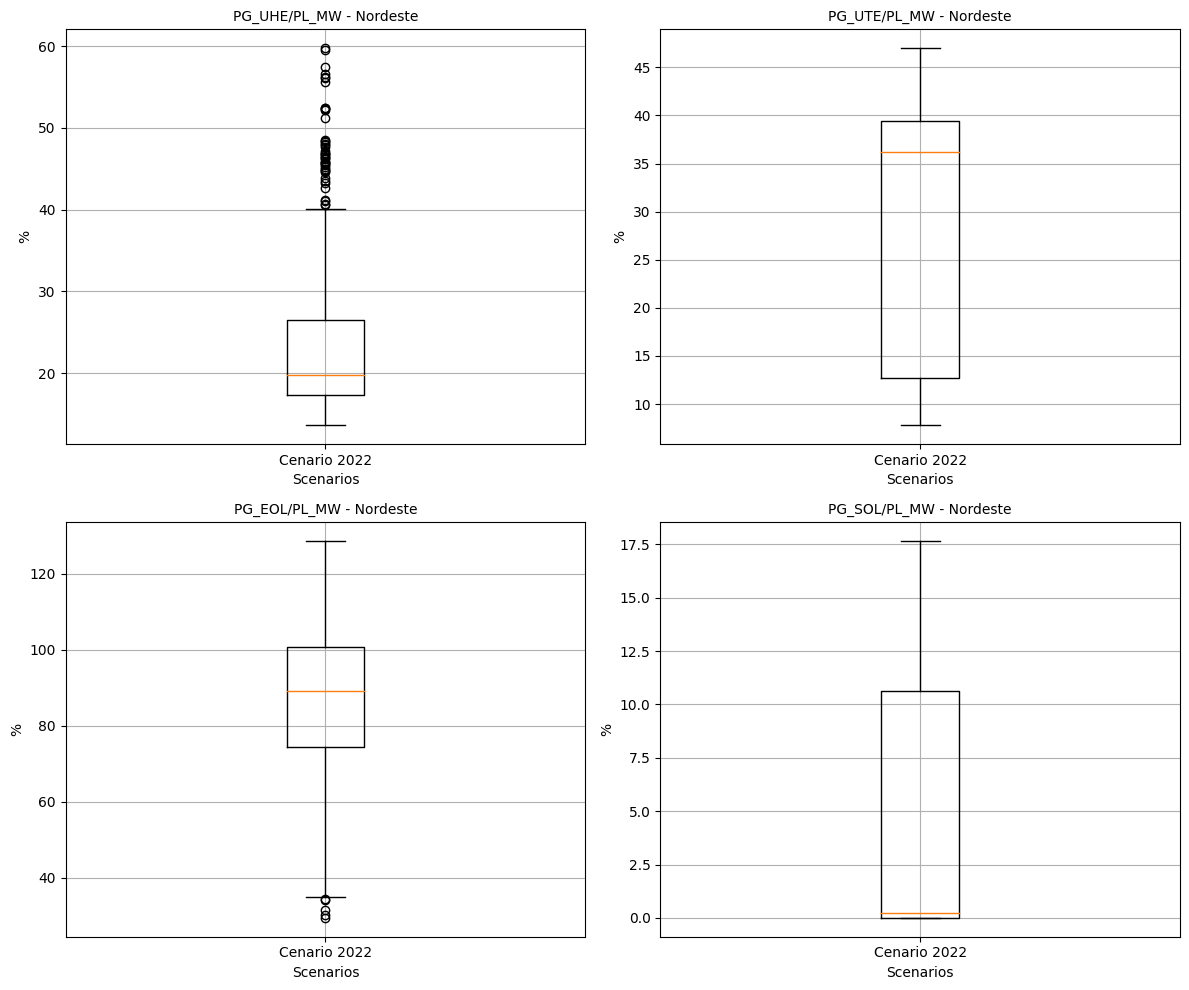

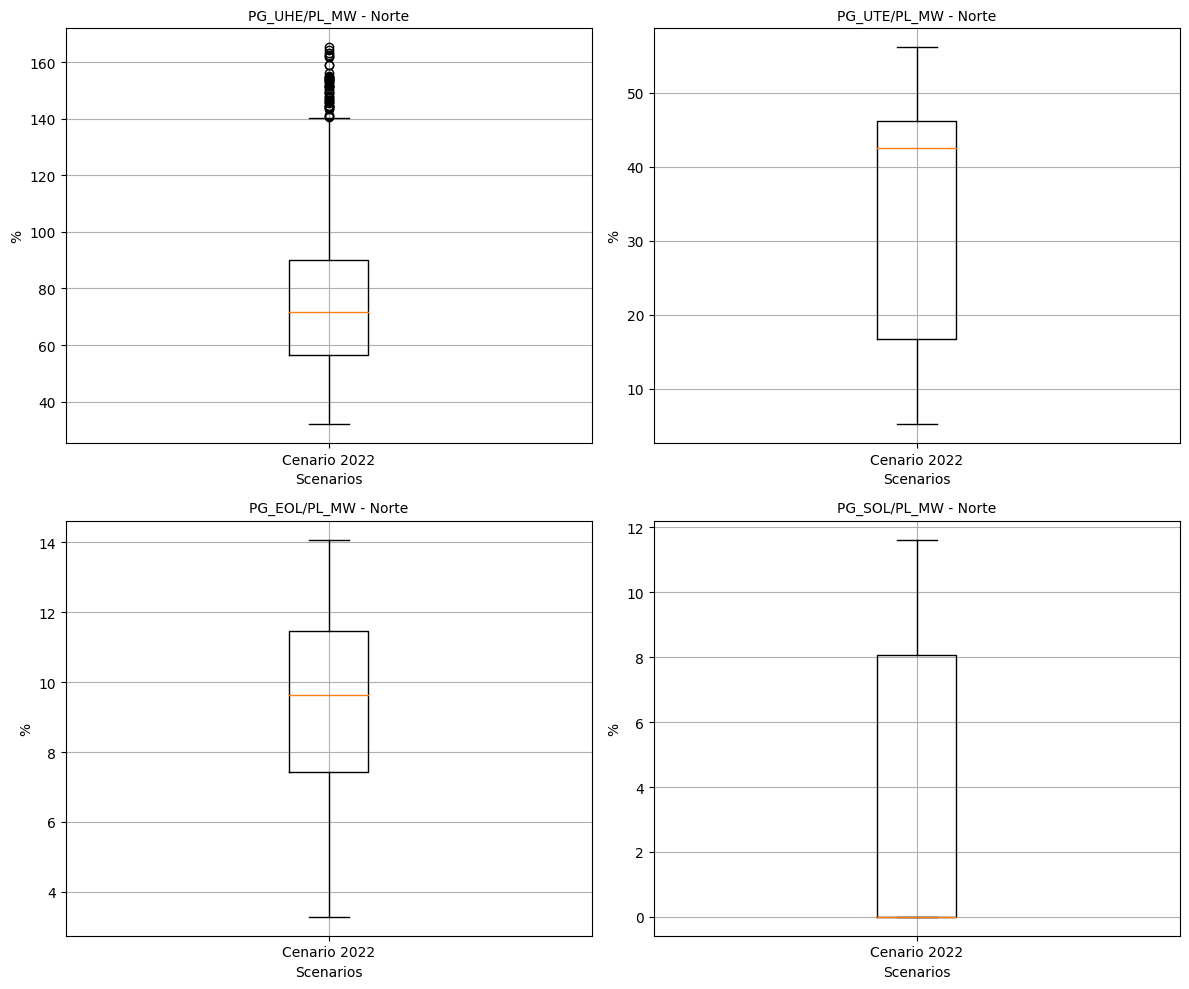

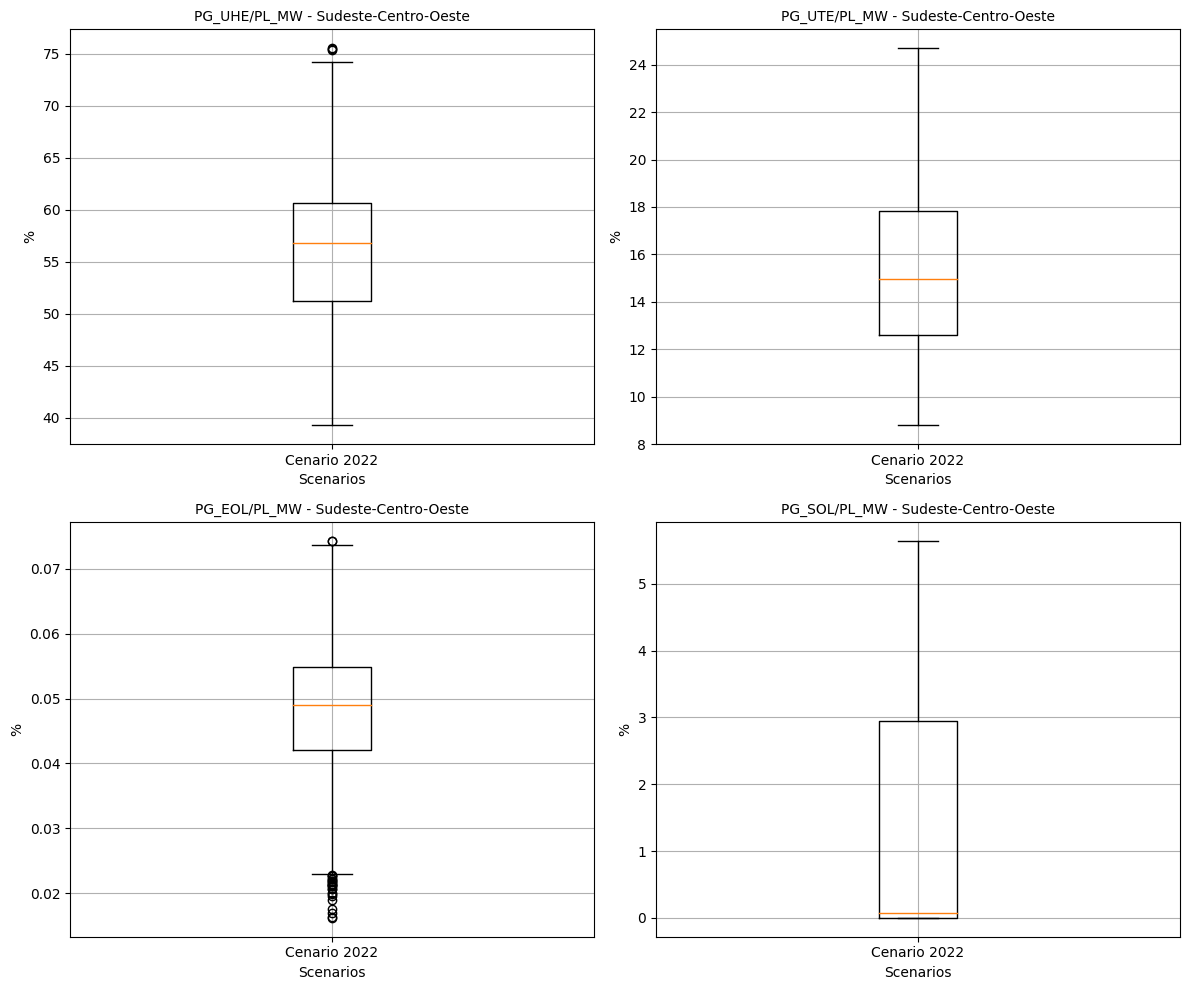

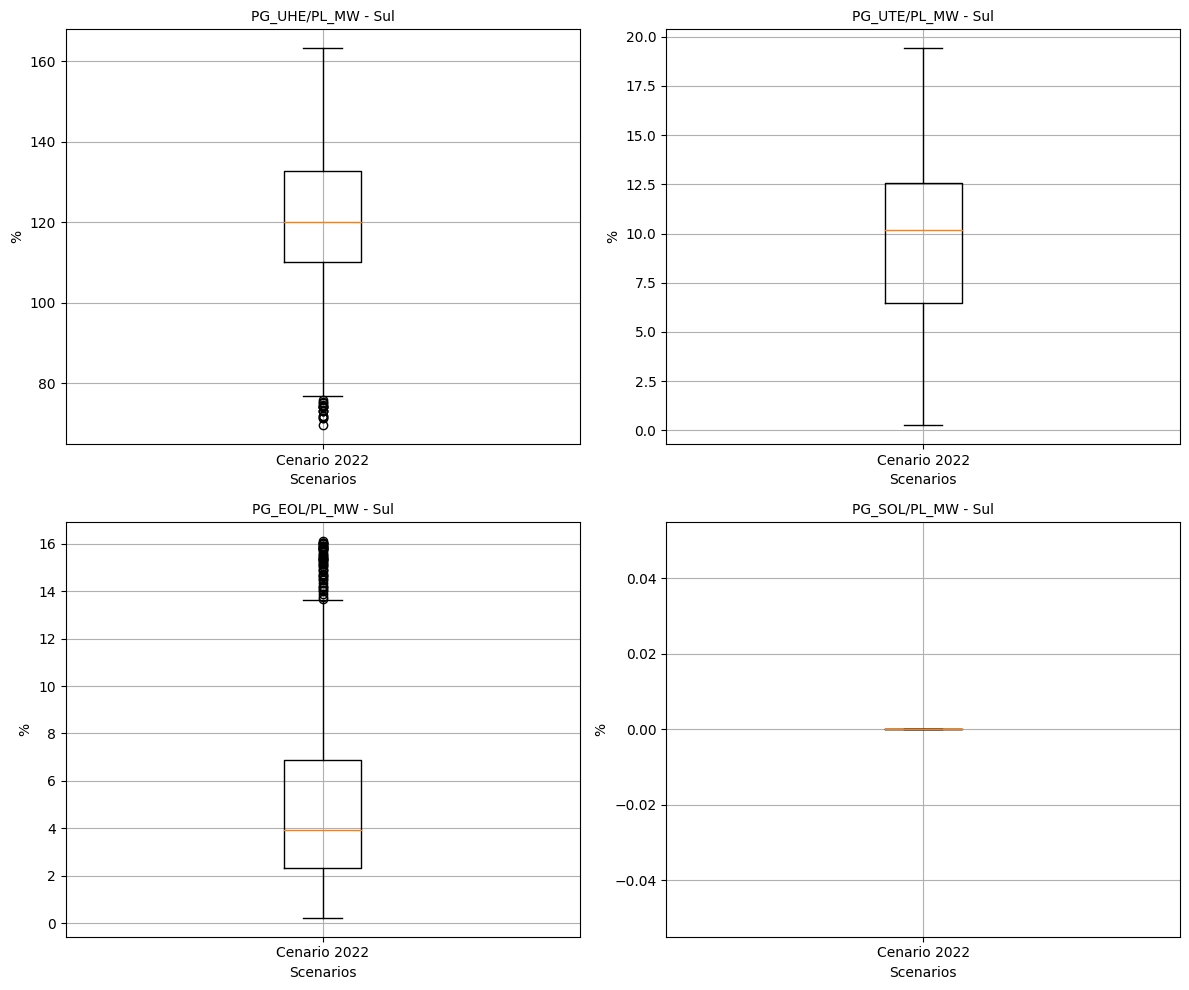

In [23]:
# Plotting
# DFF_POT_REG= DFF_POT_REG.sort_index(level='Cenario', key=lambda x: x.map({'Cenario Média': 1, 'Cenario Media F2': 2, 'Cenario Media F5': 3}))
DFF_POT_REG= DFF_POT_REG.sort_index(level='Cenario', key=lambda x: x.map({'Cenario Baixa': 1, 'Cenario Média': 2, 'Cenario Alta': 3}))
scenarios = DFF_POT_REG.index.get_level_values('Cenario').unique()
regiones = DFF_POT_REG.index.get_level_values('REG').unique()

for region in regiones:
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
    for idx, column in enumerate(['PG_UHE', 'PG_UTE', 'PG_EOL', 'PG_SOL',]):
        data_to_plot = []
        for scenario in scenarios:
            dff = DFF_POT_REG.loc[:, :, region, scenario]
            data_to_plot.append(dff[column] / dff['PL_MW']*100)
        ax = axes[idx//2, idx%2]
        ax.boxplot(data_to_plot, labels=scenarios)
        ax.set_title(f"{column}/PL_MW - {region}", fontsize = 10)
        ax.set_xlabel("Scenarios")
        ax.set_ylabel('%')
        ax.grid(True)

    plt.tight_layout()
    plt.show()

# Tensão

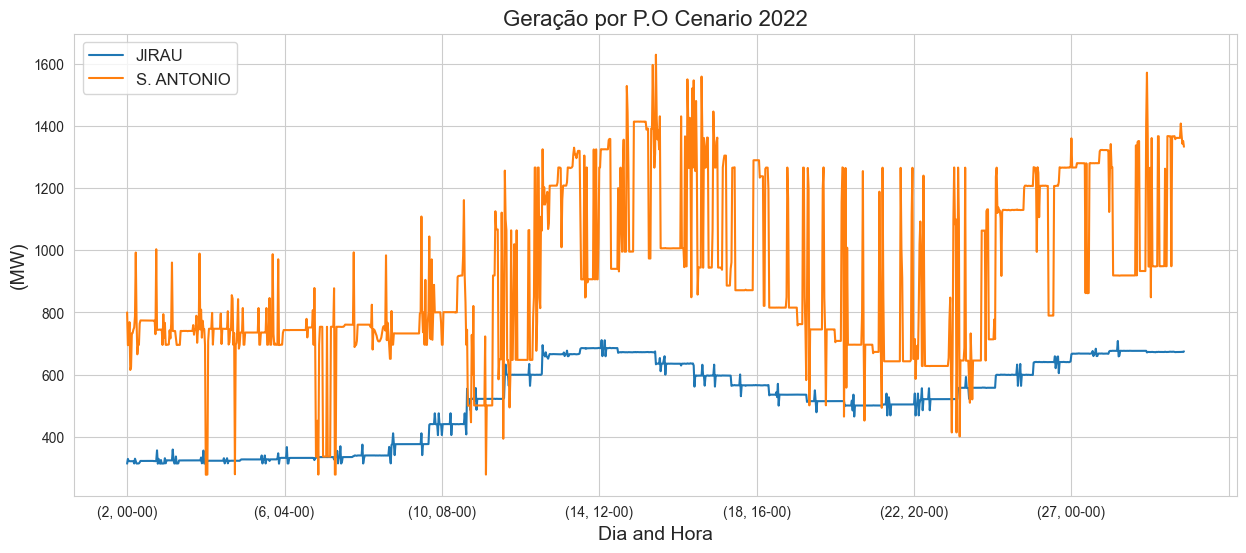

In [24]:
df = dfs['ger'][0]
cenerio_= df['Cenario'][0]
# Set style
sns.set_style("whitegrid")
# Plot data
ax = df[df['BUS_ID'].isin([7051, 7061])].groupby(by=['Dia', 'Hora'])['PG_MW'].sum().plot(figsize=(15, 6), label='JIRAU')
df[df['BUS_ID'].isin([7050, 7062, 7064])].groupby(by=['Dia', 'Hora'])['PG_MW'].sum().plot(figsize=(15, 6), label='S. ANTONIO')

# Add titles and labels
plt.title(f'Geração por P.O {cenerio_}', fontsize=16)
plt.xlabel('Dia and Hora', fontsize=14)
plt.ylabel('(MW)', fontsize=14)

# Adjust legend
plt.legend(fontsize=12, loc='upper left')

# Show plot
plt.show()

In [25]:
df_indice_grop = df_IndicePO.set_index(['Dia','Hora','Cenario'])
df_IndicePO_mod = pd.concat(dfs['Index_Modif'], axis=0)
df_indice_group = df_IndicePO_mod.set_index(['Dia','Hora','Cenario'])

In [26]:
if Analise_Tensão:
    plt.figure(figsize=(20, 7))
    plot_perfil_pot(dfs['Index_PO'], columna='DPI_PO_final', ylbl='Indice (pu)', titulo='Indice de Violação de Tensão do Ponto de Operação', ylim=[-0.05, 1.5], day=True, otherplot=True)
    plt.axhline(1, color='red', linestyle='--' ,  alpha=0.9)
    plt.show()
    plot_indice_perfil(df_resultado, df_IndicePO, 'DPI_PO_final', ylim=[0,2])
    for column in df_indice_group.columns:
        plot_indice_perfil(df_resultado, df_indice_group, column, ylim=[0,2])

## Pontos Inseguros

In [27]:
mask_inseguros = df_indice_group[(df_indice_group['PV_upper']>1) | (df_indice_group['PV_upper']>1) | (df_indice_group['PQ_lower']>1) | (df_indice_group['PQ_upper']>1)]
filtro1 = (df_ger[['Dia', 'Hora', 'Cenario']].apply(tuple, axis=1).isin(mask_inseguros.index))
df_filt_ger = df_ger[filtro1]
filtro2 = (df_nt[['Dia', 'Hora', 'Cenario']].apply(tuple, axis=1).isin(mask_inseguros.index))
df_filt_nt = df_nt[filtro2]
df_complete = pd.concat([df_filt_nt, df_filt_ger], axis=0)

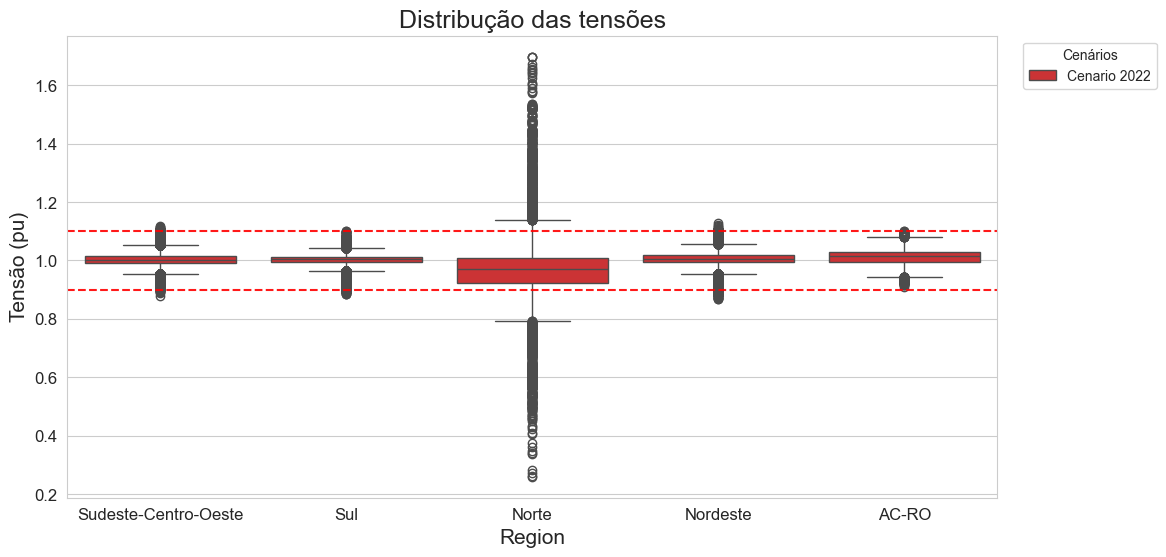

In [28]:
boxplot_voltage(df_complete, clase = "REG", titulo = 'Distribução das tensões', xlbl = 'Region')

In [29]:
# busesshunt = [85,7055,8100,7059,7050,7051,7061,7062,7064,7053,7063,7060,7056,7065]
eloFozibiuna = [85, 86]
eloPVelArarq = [7055, 7057]
eloCPVbtbPvel = [7059, 7054]
eloXinguTR = [8100, 9605]
eloXinguESTR = [8100, 3010]
Jirau = [7051, 7061]
S_Antonio = [7050, 7062, 7064]


df_complete_t = pd.concat([df_nt, df_ger], axis=0)

region_ = 'Norte'
# buses = eloFozibiuna+eloPVelArarq+eloCPVbtbPvel+eloXinguTR+eloXinguESTR
# buses = [6888, 6892, 6891, 6911, 6912, 6913]
buses = Jirau
var = ['PG_MW']
# var = ['B0_MVAR']

dff_1 = df_complete_t[df_complete_t['BUS_ID'].isin(buses)]
dff_2 = dff_1.groupby(by=['Dia','Hora','Cenario'])[var].sum()
if region_ == 'ALL':
    dff_3 = df_complete_t.groupby(by=['Dia','Hora','Cenario'])[['PL_MW', 'QL_MVAR', 'B0_MVAR']].sum()
else:
    dff_3 = df_complete_t[(df_complete_t['REG']==region_)].groupby(by=['Dia','Hora','Cenario'])[['PL_MW', 'QL_MVAR', 'B0_MVAR']].sum()

dff_4 = dff_2.merge(dff_3, on=['Dia', 'Hora', 'Cenario'], how='left')
dff_5 = dff_4.merge(df_indice_group, on=['Dia', 'Hora', 'Cenario'], how='left')

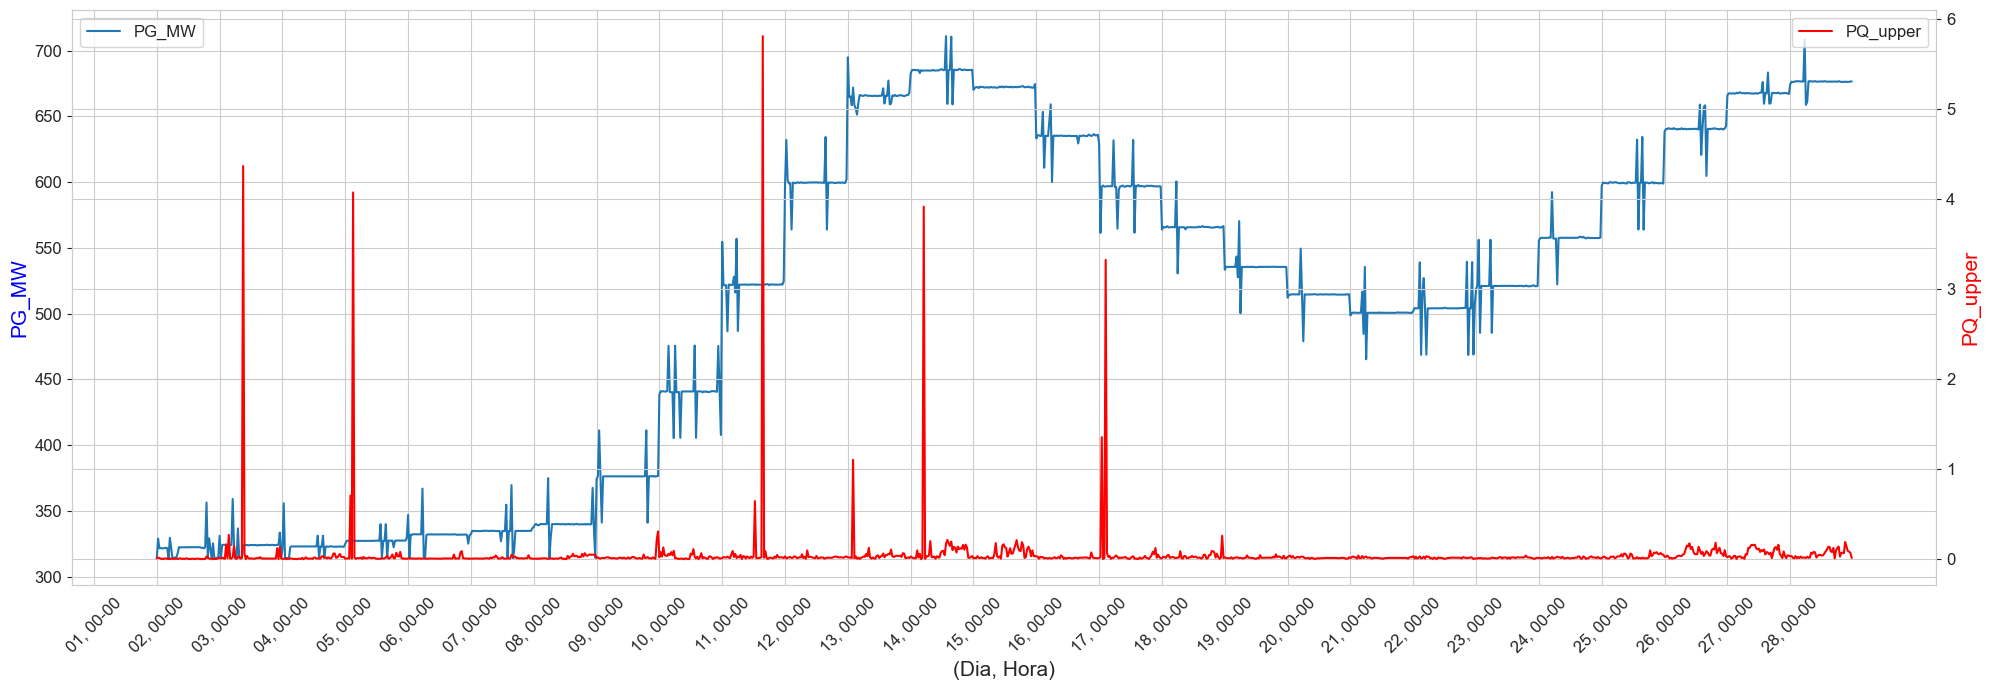

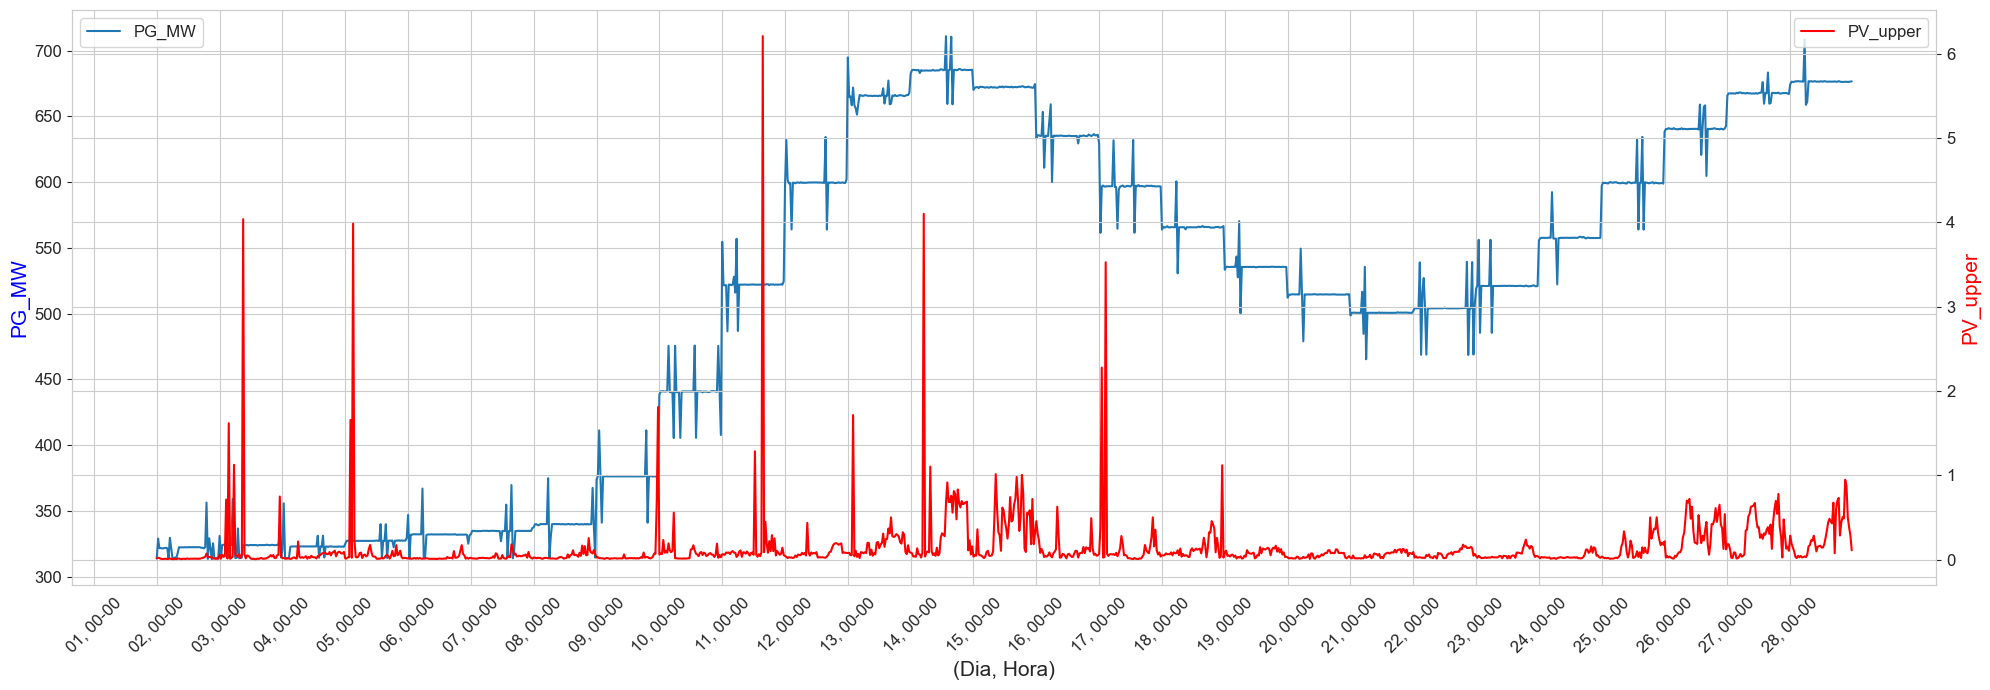

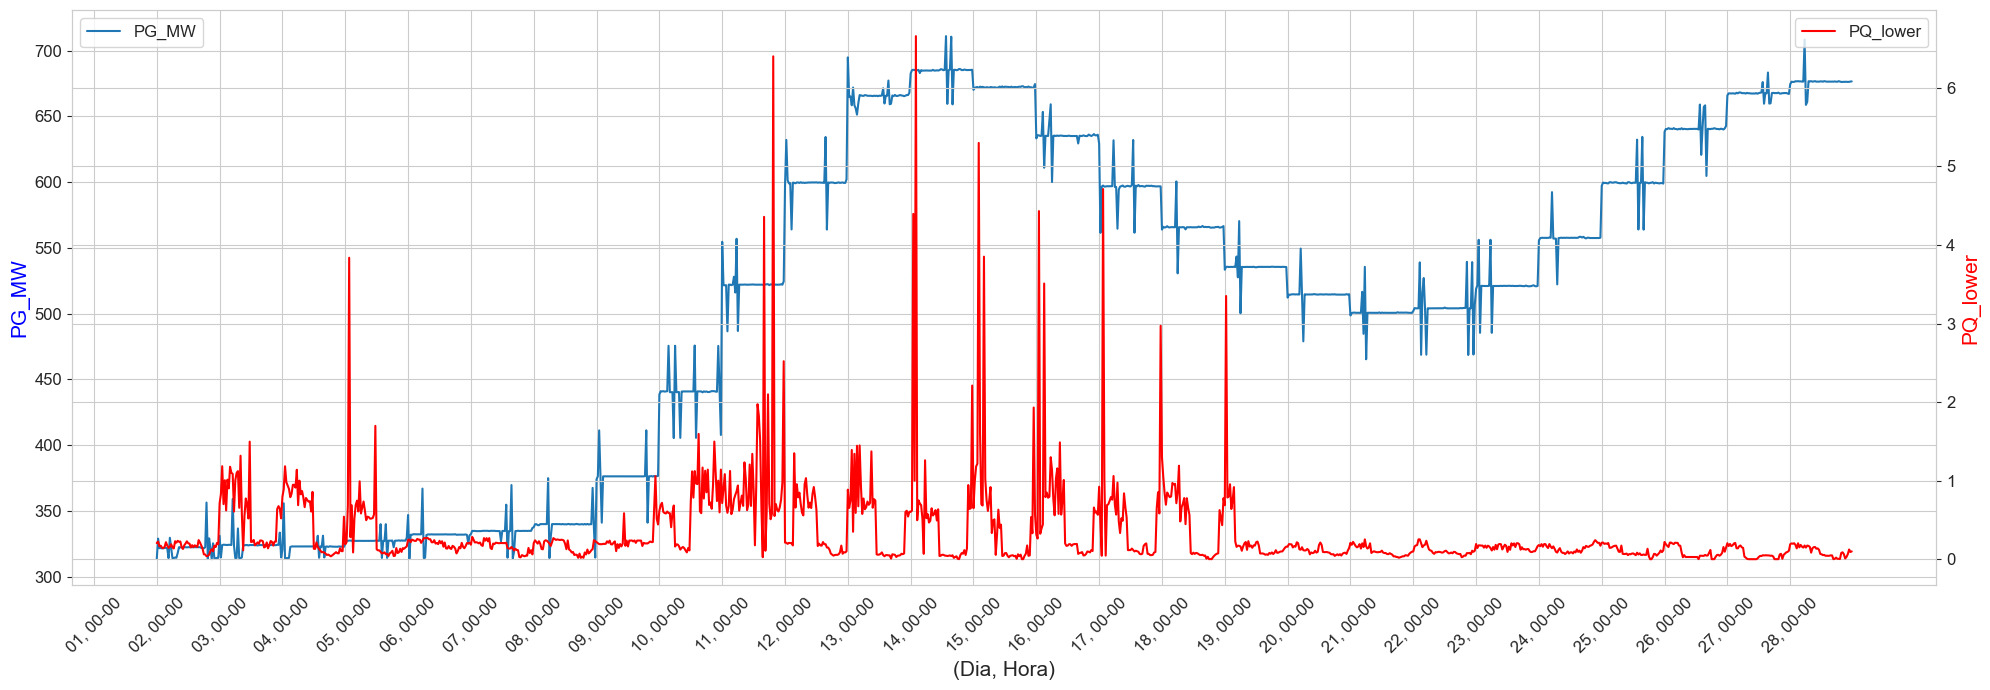

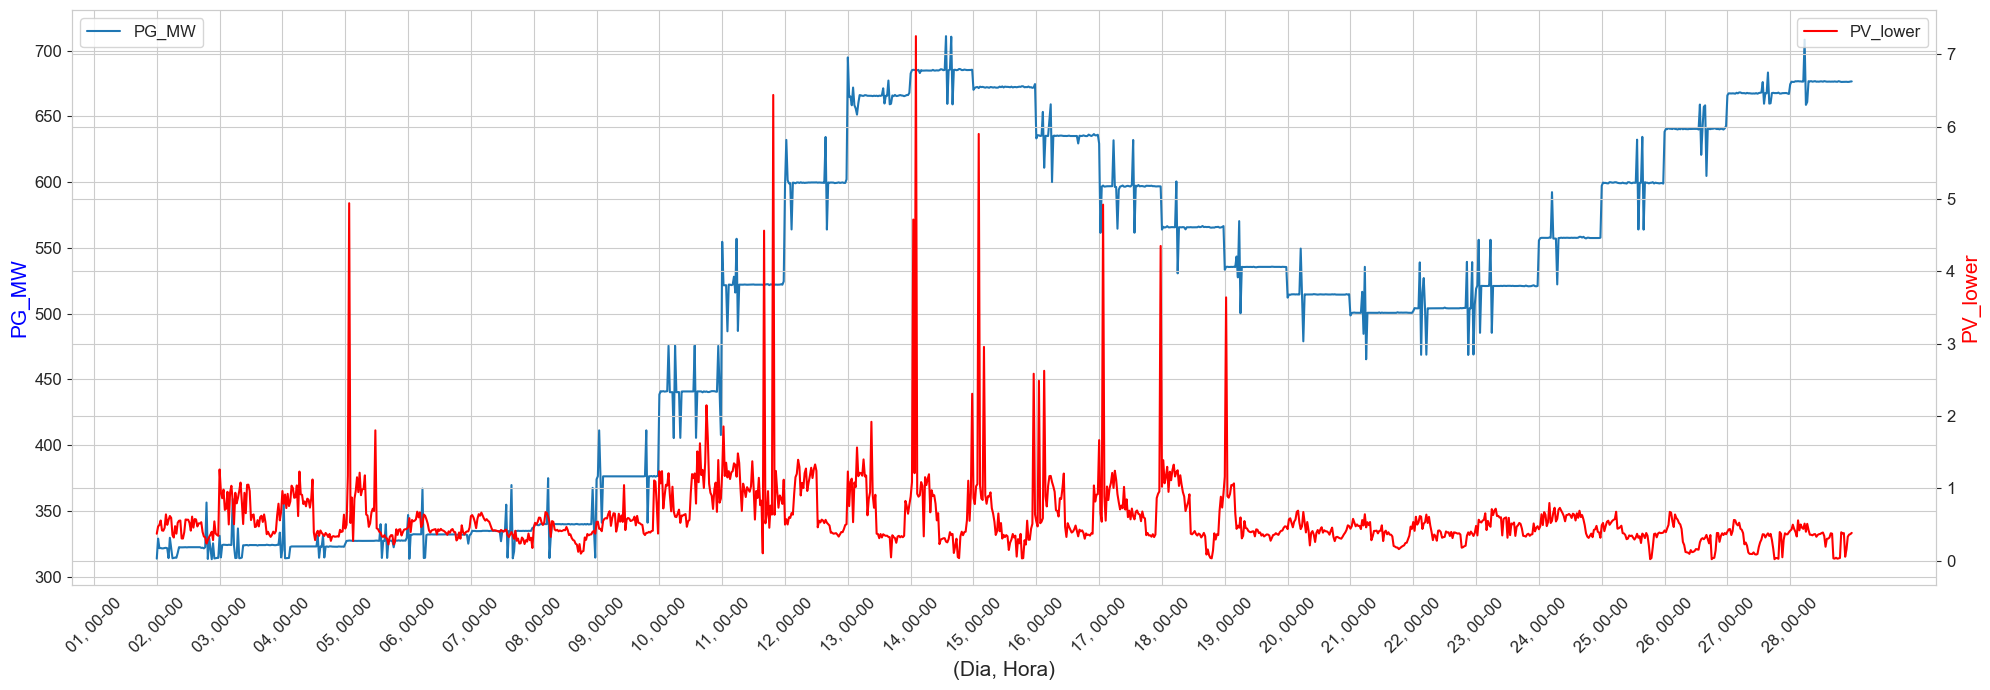

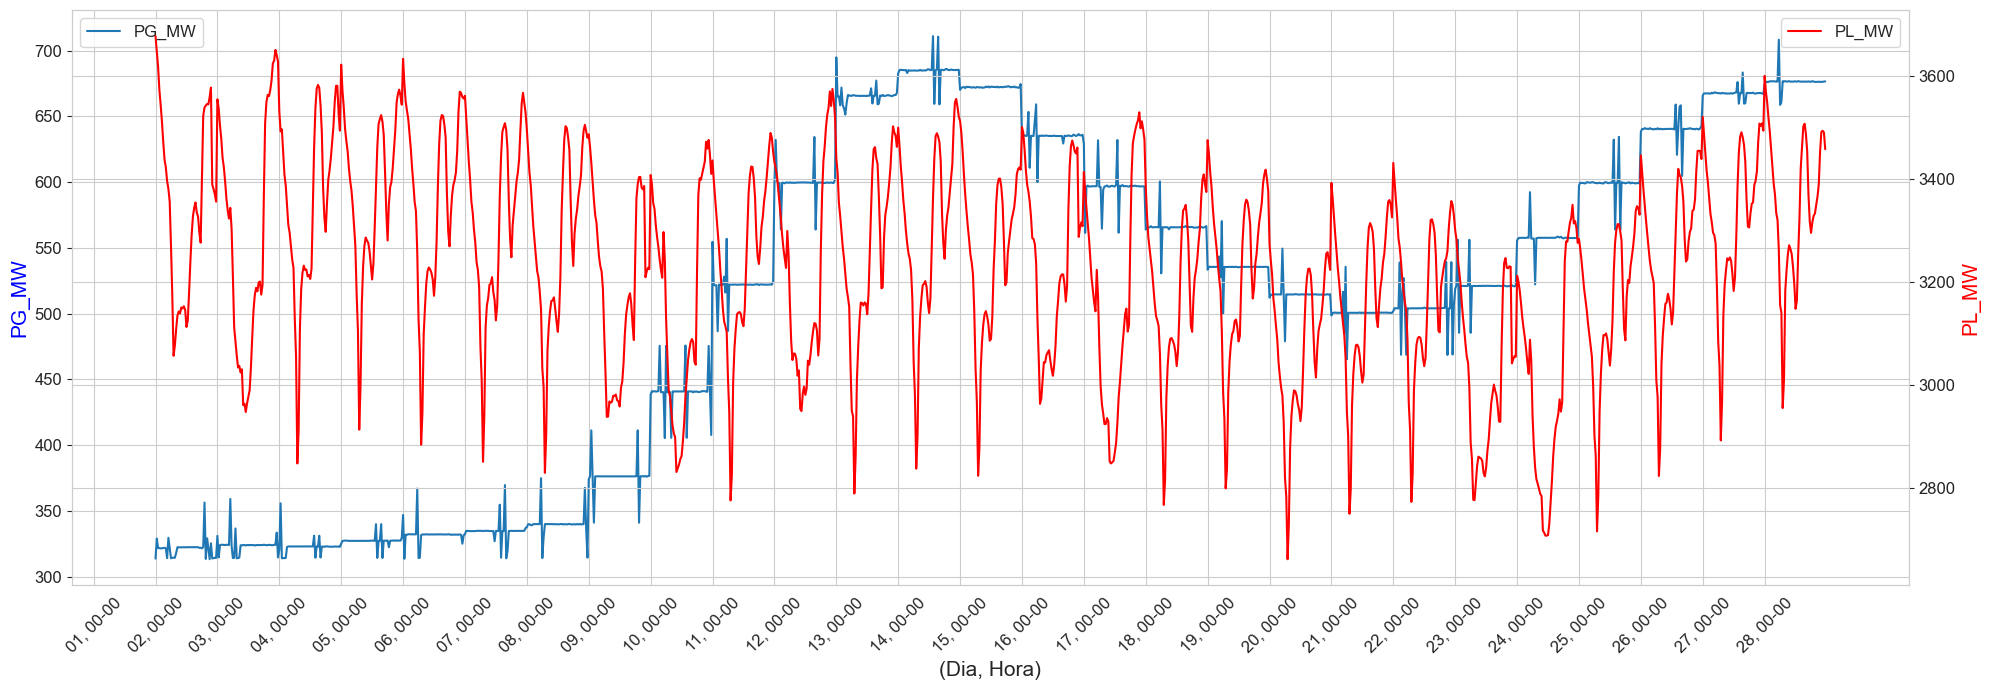

In [30]:
DFF5 = dff_5.reset_index()
plot_potencia_perfil_2(df_resultado, DFF5[DFF5['Cenario']==DFF5['Cenario'].unique()[0]], 'PG_MW','PQ_upper', markers=False)
plot_potencia_perfil_2(df_resultado, DFF5[DFF5['Cenario']==DFF5['Cenario'].unique()[0]], 'PG_MW','PV_upper', markers=False)
plot_potencia_perfil_2(df_resultado, DFF5[DFF5['Cenario']==DFF5['Cenario'].unique()[0]], 'PG_MW','PQ_lower', markers=False)
plot_potencia_perfil_2(df_resultado, DFF5[DFF5['Cenario']==DFF5['Cenario'].unique()[0]], 'PG_MW','PV_lower', markers=False)
plot_potencia_perfil_2(df_resultado, DFF5[DFF5['Cenario']==DFF5['Cenario'].unique()[0]], 'PG_MW','PL_MW', markers=False)

In [31]:
'''
============ Geração RO ================
6822: (PBUEN2PCH138) SISTEMA 138KV
6831: (ROND2-UHE003) SISTEMA 138KV
6832: (ROND2-UTE000) SISTEMA 138KV (TERMICA SEM DADOS DE GERADOR)

6888 (SA-AD1UHE003) - SISTEMA 230KV
6892 (SA-AD2UHE003) - SISTEMA 230KV
6891 (SAMU1-UHE005) - SISTEMA 230KV

6911 (T.NOR1UTE000) - SISTEMA 230KV (TERMICA SEM DADOS DE GERADOR)
6912 (T.N2-GUTE000) - SISTEMA 230KV
6913 (T.N2-VUTE000) - SISTEMA 230KV
============ COMP. SYN ================
ARIQU-SIN001
JIPAR-SIN001
============= Mostra quantas barras Com Violação tem em cada Região ==========

# df_complete[df_complete['MODV_PU']>1.10].groupby(['REG'])['BUS_ID'].unique()
# df_complete[df_complete['MODV_PU']< 0.90].groupby(['REG'])['BUS_ID'].unique()['AC-RO'].shape

#EL FLUJO DE POTENCIA REACTIVA VA DE LA MAIOR TENSIOHN A ALA MENOR TENSION
#El flujo de potencia va de la barra caon angulo mas adelantado a la barra con angulo mas atrado
'''

"\n============ Geração RO ================\n6822: (PBUEN2PCH138) SISTEMA 138KV\n6831: (ROND2-UHE003) SISTEMA 138KV\n6832: (ROND2-UTE000) SISTEMA 138KV (TERMICA SEM DADOS DE GERADOR)\n\n6888 (SA-AD1UHE003) - SISTEMA 230KV\n6892 (SA-AD2UHE003) - SISTEMA 230KV\n6891 (SAMU1-UHE005) - SISTEMA 230KV\n\n6911 (T.NOR1UTE000) - SISTEMA 230KV (TERMICA SEM DADOS DE GERADOR)\n6912 (T.N2-GUTE000) - SISTEMA 230KV\n6913 (T.N2-VUTE000) - SISTEMA 230KV\n============ COMP. SYN ================\nARIQU-SIN001\nJIPAR-SIN001\n============= Mostra quantas barras Com Violação tem em cada Região ==========\n\n# df_complete[df_complete['MODV_PU']>1.10].groupby(['REG'])['BUS_ID'].unique()\n# df_complete[df_complete['MODV_PU']< 0.90].groupby(['REG'])['BUS_ID'].unique()['AC-RO'].shape\n\n#EL FLUJO DE POTENCIA REACTIVA VA DE LA MAIOR TENSIOHN A ALA MENOR TENSION\n#El flujo de potencia va de la barra caon angulo mas adelantado a la barra con angulo mas atrado\n"

In [32]:
# ========================= CODIGO PARA COMPARAR DEMANDA NORUS E DEMANDA UNICAMP ===================================
DFF_POT['PG_FERV'] = (DFF_POT['PG_EOL'] + DFF_POT['PG_SOL'])
DFF_POT['Demanda_Liquida'] = DFF_POT['PL_MW'] - DFF_POT['PG_FERV']
df_DbrutaNorus = pd.read_csv('C:/Users/David/OneDrive/Documents/FERV_documentos/Dados Demanda V2A2_2026/demanda_bruta/demanda_bruta_SIN.csv', sep=';')
# df_DbrutaNorus = pd.read_csv('C:/Users/David/OneDrive/Documents/FERV_documentos/Dados Demanda V2A2_2026/demanda_liquida/demanda_liquida_SIN.csv', sep=';')
df_DbrutaNorus['Dia_Hora'] = df_resultado[df_resultado['Cenario']=='Cenario Media F2']['Dia_Hora']
df_DbrutaNorus['Dia'], df_DbrutaNorus['Hora'] = df_resultado[df_resultado['Cenario']=='Cenario Media F2']['Dia'], df_resultado[df_resultado['Cenario']=='Cenario Media F2']['Hora']
df_DbrutaNorus['Cenario'] = 'V2A2F2_2026_Norus'
df_compare_demand = df_resultado.merge(df_DbrutaNorus[['Dia_Hora','Dia','Hora','Cenario', 'MW']], on=['Dia_Hora','Dia','Hora','Cenario'] , how='outer').rename(columns={"MW": "PL_MW"})

# plot_potencia_perfil(df_compare_demand[df_compare_demand['Cenario'].isin(['Cenario Media F2', 'V2A2F2_2026_Norus'])], DFF_POT, 'PL_MW', markers =  False,)
# df = DFF_POT.reset_index()
# plot_perfil_pot([df[df['Cenario']=='Cenario Media F2']], columna='Demanda_Liquida', ylbl='P (MW)', titulo='Perfil de Geração Potencia Ativa (MW)', day=True)

# Correlation Analysis

In [33]:
df_linhas = pd.concat(filtarNC(dfs['linhas']), axis=0)
df_intercambios = pd.concat(filtarNC(dfs['intercambios']), axis=0)
df_HVDC = pd.concat(filtarNC(dfs['HVDC']), axis=0)
df_Indice = pd.concat(filtarNC(dfs['Index']), axis=0)
df_Trafo = pd.concat(filtarNC(dfs['Trafo']), axis=0)

df_Trafo.rename(columns={'% L1': '% L1_Trafo'}, inplace=True)
df_Trafo.rename(columns={'Mvar:Losses': 'Mvar:Losses_Trafo'}, inplace=True)
df_Trafo_grouped_REG = df_Trafo[df_Trafo['VBASEKV'].isin([230, 345, 440, 500, 525, 765])].groupby(by = ['Dia','Hora','REG','Cenario']).agg({'% L1_Trafo':'mean', 'Mvar:Losses_Trafo':'sum'})

df_linhas_grouped_REG = df_linhas[df_linhas['VBASEKV'].isin([230, 345, 440, 500, 525, 765])].groupby(by = ['Dia','Hora','REG','Cenario']).agg({'% L1':'mean', 'Mvar:Losses':'sum'})
df_intercambios.rename(columns={'Unnamed: 0': 'Intercambio'}, inplace=True)
df_HVDC.rename(columns={'Unnamed: 0': 'Elo'}, inplace=True)
df_Indice.rename(columns={'Unnamed: 0': 'Indice'}, inplace=True)

df_linhas_grouped = df_linhas[df_linhas['VBASEKV'].isin([230, 345, 440, 500, 525, 765])].groupby(by = ['Dia','Hora','Cenario']).agg({'% L1':'mean', 'Mvar:Losses':'sum'})

### Demanda

In [34]:
def histplot_linhas_0(df, yvalue, titulo, xlbl, ylim = None):
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x=yvalue, kde=True, bins=30 ,alpha=0.75, element='bars', palette = "Set1",)
    plt.axvline(df[yvalue].mean(), color='black', linestyle='dashed', linewidth=1.2)
    plt.title(titulo, fontsize=18)
    plt.xlabel(xlbl, fontsize=15)
    plt.ylabel('Frequency', fontsize=15)
    plt.tick_params(axis='both', labelsize=12)
    if ylim !=  None:
        plt.ylim(ylim)
    nome = folderimg+titulo+'.svg'
    plt.savefig(nome)
    plt.show()

# histplot_linhas_0(DFF_POT.loc[:,:,'Cenario Alta'], 'PL_MW' , 'Active Power distribution of the Load', '(MW)', ylim = None)
# histplot_linhas_0(DFF_POT.loc[:,:,'Cenario Alta'], 'QL_MVAR' , 'Reactive Power distribution of the Load', '(MVAR)', ylim = None)

### Shunt Analise

In [35]:
# if Analise_Shunt:
#     boxplot_linhas(DFF_POT_REG, 'REG', 'Shunt_Ind','Shunt Indutivo por região', 'Region', '(MVAR)', ylim = None)
#     boxplot_linhas(DFF_POT_REG, 'REG', 'ReservaINDshunt' , 'Reserva Indutiva Shunt por região', 'Region', '(MVAR)', ylim = None)

In [36]:
# if Analise_Shunt:
#     boxplot_linhas(DFF_POT_REG, 'REG', 'Shunt_Cap','Shunt Capacitivo por região', 'Region', '(MVAR)', ylim = None)
#     boxplot_linhas(DFF_POT_REG, 'REG', 'ReservaCAPshunt' , 'Reserva Capacitiva Shunt por região', 'Region', '(MVAR)', ylim = None)

### Carregameto e Perdas reativas

In [37]:
df_linhas_grouped_500up = df_linhas[df_linhas['VBASEKV'].isin([500, 525, 765])].groupby(by = ['Dia','Hora','Cenario']).agg({'% L1':'mean', 'Mvar:Losses':'sum'})
df_linhas_grouped_500up = df_linhas_grouped_500up.reorder_levels(['Dia', 'Hora', 'Cenario']).sort_index(level='Cenario', key=lambda x: x.map({'Cenario Baixa': 1, 'Cenario Média': 2, 'Cenario Alta': 3,'Cenario MPV': 4}))
df_linhas_grouped_500down = df_linhas[df_linhas['VBASEKV'].isin([230, 345, 440,])].groupby(by = ['Dia','Hora','Cenario']).agg({'% L1':'mean', 'Mvar:Losses':'sum'})
df_linhas_grouped_500down = df_linhas_grouped_500down.reorder_levels(['Dia', 'Hora', 'Cenario']).sort_index(level='Cenario', key=lambda x: x.map({'Cenario Baixa': 1, 'Cenario Média': 2, 'Cenario Alta': 3,'Cenario MPV': 4}))
dflines500up_ = df_linhas_grouped_500up.rename(columns={'% L1': '% L1_500up', 'Mvar:Losses':'Mvar:Losses_500up'})
dflines500down_ = df_linhas_grouped_500down.rename(columns={'% L1': '% L1_500down', 'Mvar:Losses':'Mvar:Losses_500down'})
df_linhas_grouped_VLsep = pd.concat([dflines500up_, dflines500down_],axis=1)
DF_complete_PO = df_linhas_grouped_VLsep.merge(df_linhas_grouped, on= ['Dia', 'Hora','Cenario'],how='left')
DF_complete_PO = DF_complete_PO.merge(DFF_POT, on= ['Dia', 'Hora','Cenario'],how='left')
# =================================================== POR REGIÃO ==============================================================================================================
df_linhas_grouped_REG_500up = df_linhas[df_linhas['VBASEKV'].isin([500, 525, 765])].groupby(by = ['Dia','Hora','REG','Cenario']).agg({'% L1':'mean', 'Mvar:Losses':'sum'})
df_linhas_grouped_REG_500up = df_linhas_grouped_REG_500up.reorder_levels(['Dia','Hora','REG','Cenario'])
df_linhas_grouped_REG_500down = df_linhas[df_linhas['VBASEKV'].isin([230, 345, 440,])].groupby(by = ['Dia','Hora','REG','Cenario']).agg({'% L1':'mean', 'Mvar:Losses':'sum'})
df_linhas_grouped_REG_500down = df_linhas_grouped_REG_500down.reorder_levels(['Dia','Hora','REG','Cenario'])
dflines500up = df_linhas_grouped_REG_500up.rename(columns={'% L1': '% L1_500up', 'Mvar:Losses':'Mvar:Losses_500up'})
dflines500down = df_linhas_grouped_REG_500down.rename(columns={'% L1': '% L1_500down', 'Mvar:Losses':'Mvar:Losses_500down'})
df_linhas_grouped_REG = pd.concat([dflines500up, dflines500down],axis=1)
DF_complete_PO_REG = df_linhas_grouped_REG.merge(DFF_POT_REG, on= ['Dia', 'Hora','REG','Cenario'],how='left')

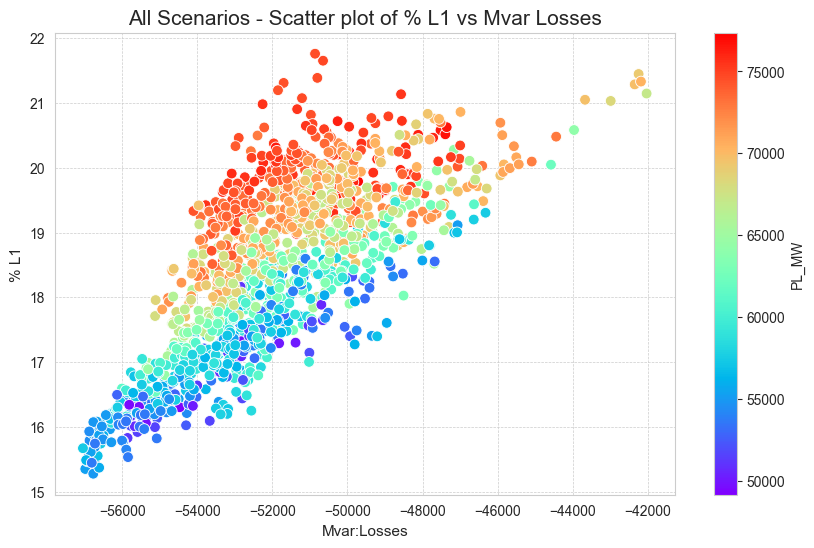

Indice de Correlación: 0.7521573777413587


In [38]:
scatterplot(DF_complete_PO, 'Mvar:Losses', '% L1', 'PL_MW',namedir='All Scenarios -')

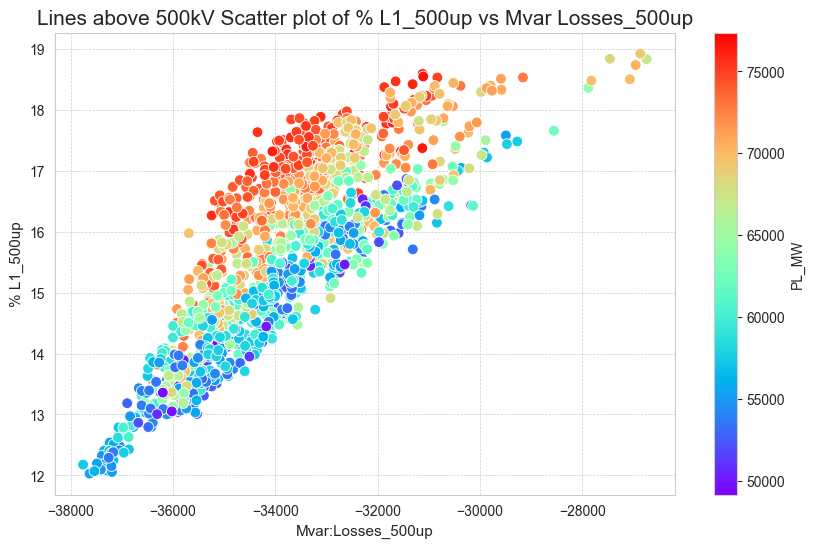

Indice de Correlación: 0.8223522011393263


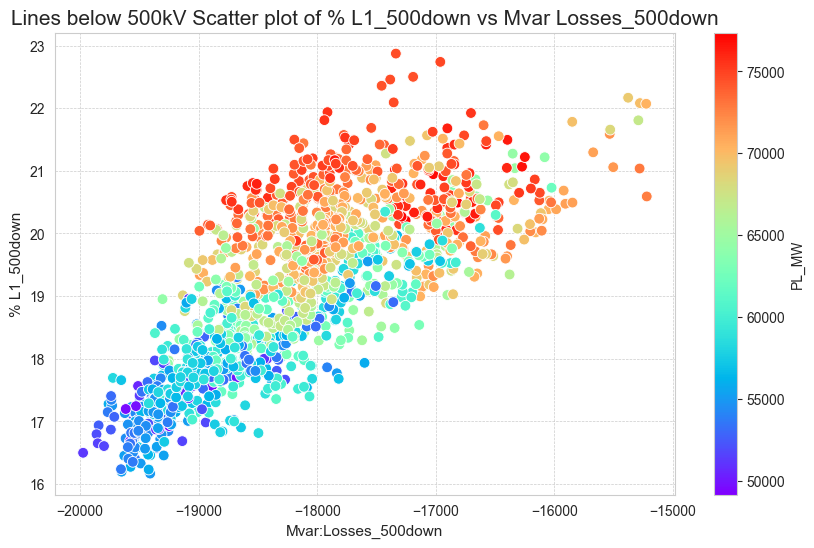

Indice de Correlación: 0.7474924544676829


In [39]:
# scatterplot(DF_complete_PO, 'Mvar:Losses', '% L1',)
scatterplot(DF_complete_PO, 'Mvar:Losses_500up', '% L1_500up', 'PL_MW', namedir ='Lines above 500kV')
# scatterplot(DF_complete_PO, 'Mvar:Losses', '% L1',)
scatterplot(DF_complete_PO, 'Mvar:Losses_500down', '% L1_500down', 'PL_MW', namedir ='Lines below 500kV')

# df_IndicePO_mod_group = df_IndicePO_mod.set_index(['Dia','Hora','Cenario'])
# df_PO_Cenario_completo = df_IndicePO_mod_group.merge(DF_complete_PO, on=['Dia', 'Hora', 'Cenario'], how='left')
# scatterplot(df_PO_Cenario_completo, 'PV_lower', 'Mvar:Losses', '% L1',xlimites=[0,2])
# scatterplot(df_PO_Cenario_completo, 'PQ_lower', 'Mvar:Losses', '% L1',xlimites=[0,2])
# scatterplot(df_PO_Cenario_completo, 'PV_upper', 'Mvar:Losses', '% L1',xlimites=[0,1.5])
# scatterplot(df_PO_Cenario_completo, 'PQ_upper', 'Mvar:Losses', '% L1',xlimites=[0,1.5])

In [40]:
df_linhas_grouped_REG_500up.index.get_level_values('REG').unique()

Index(['Nordeste', 'Norte', 'Sudeste-Centro-Oeste', 'Sul'], dtype='object', name='REG')

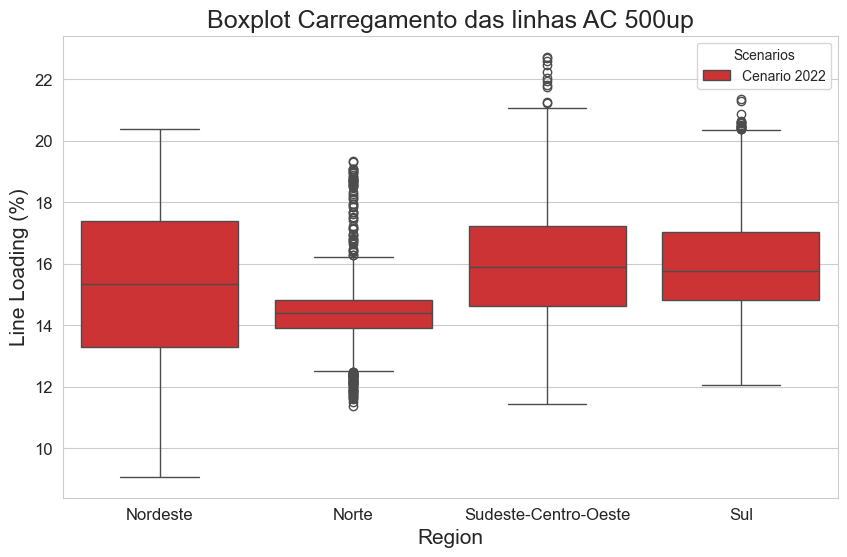

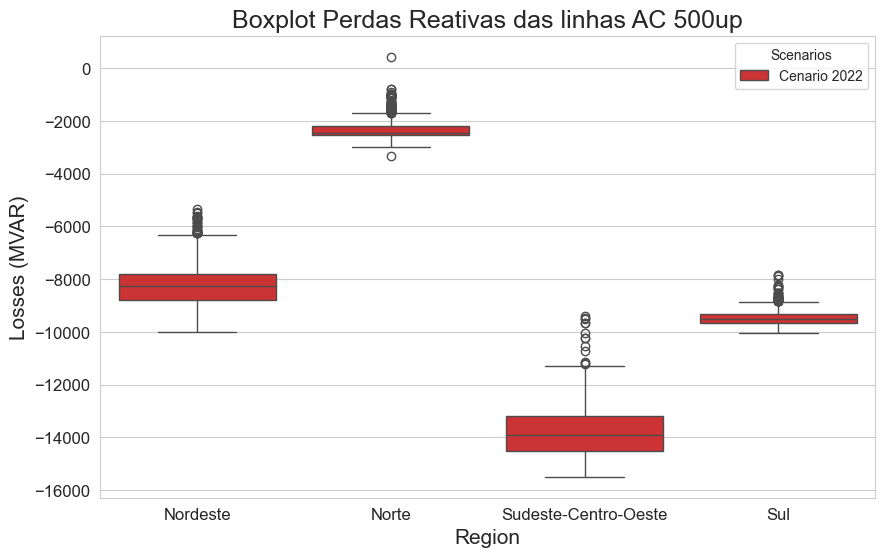

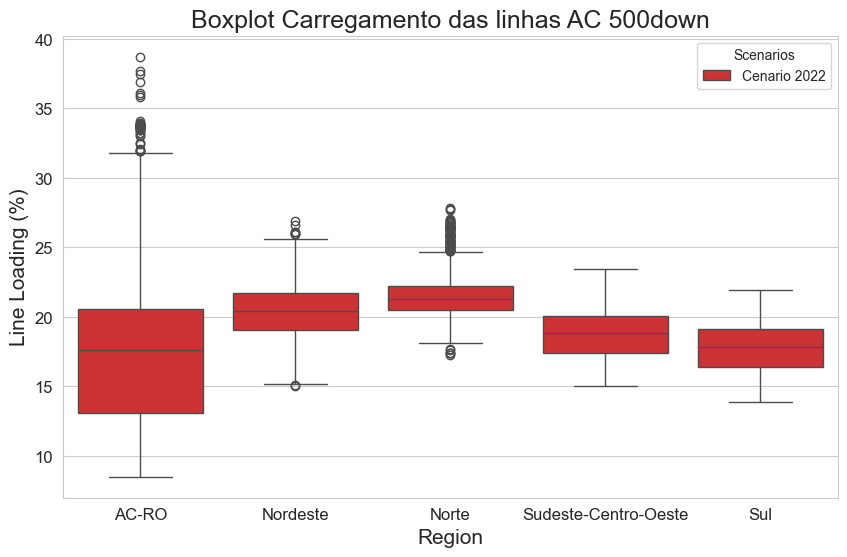

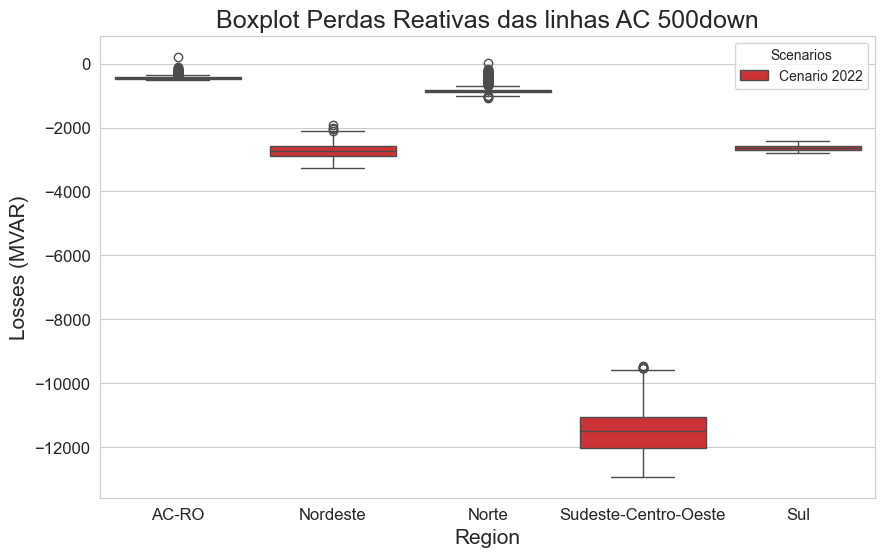

In [41]:
if Analise_Linhas:
    boxplot_linhas(df_linhas_grouped_REG_500up, 'REG', '% L1' , 'Boxplot Carregamento das linhas AC 500up', 'Region', 'Line Loading (%)', ylim = None)
    boxplot_linhas(df_linhas_grouped_REG_500up, 'REG', 'Mvar:Losses' , 'Boxplot Perdas Reativas das linhas AC 500up', 'Region', 'Losses (MVAR)', ylim = None)
    boxplot_linhas(df_linhas_grouped_REG_500down, 'REG', '% L1' , 'Boxplot Carregamento das linhas AC 500down', 'Region', 'Line Loading (%)', ylim = None)
    boxplot_linhas(df_linhas_grouped_REG_500down, 'REG', 'Mvar:Losses' , 'Boxplot Perdas Reativas das linhas AC 500down', 'Region', 'Losses (MVAR)', ylim = None)

In [42]:
# # ================== Correlação Carregamento e Perdas Reativas por REGIÃO=====================================
# for region in regiones:
#     scatterplot(DF_complete_PO_REG.loc[:,:,region,:], 'Mvar:Losses_500up','% L1_500up', 'ReservaINDshunt', namedir = region)
#     scatterplot(DF_complete_PO_REG.loc[:,:,region,:], 'Mvar:Losses_500down','% L1_500down', 'ReservaINDshunt', namedir = region)

# Dataframes Merge and Filtering

In [43]:
df_intercambios_01 = df_intercambios.set_index(['Dia','Hora','Cenario','Intercambio'])
df_hvdc_01 = df_HVDC.set_index(['Dia','Hora','Cenario','Elo'])
concatenated_HVDC = pd.concat([df_hvdc_01.loc[:,:,:,'Elo_FOZ-IBIUNA'][' P(MW)'], df_hvdc_01.loc[:,:,:,'Elo_PVEL-ARARQ'][' P(MW)'], df_hvdc_01.loc[:,:,:,'Elo_XINGU-SE'][' P(MW)']], axis=1,keys=['Elo_FOZ-IBIUNA', 'Elo_PVEL-ARARQ', 'Elo_XINGU-SE'])
concatenated_FluxoAC = pd.concat([df_intercambios_01.loc[:,:,:,'Fluxo_N-S']['MW:From-To'],df_intercambios_01.loc[:,:,:,'Fluxo_NE-N']['MW:From-To'], df_intercambios_01.loc[:,:,:,'Fluxo_NE-SE']['MW:From-To'], df_intercambios_01.loc[:,:,:,'Fluxo_SUL-SECO']['MW:From-To']], axis=1, keys=['Fluxo_N-S', 'Fluxo_NE-N', 'Fluxo_NE-SE', 'Fluxo_SUL-SECO'])
df_Inter_AC_DC = concatenated_HVDC.merge(concatenated_FluxoAC, on =['Dia','Hora','Cenario'], how='left')

df_Indice_REG = df_Indice.set_index(['Indice','Dia','Hora','REG','Cenario'])
df_Indice_REG_PV = df_Indice_REG.loc['DPI_PV']
df_Indice_REG_PQ = df_Indice_REG.loc['DPI_PQ']

Aux_PV = df_Indice_REG_PV.merge(DF_complete_PO_REG, on =['Dia','Hora','REG','Cenario'], how='left')
Aux_PV_2 = Aux_PV.merge(df_Trafo_grouped_REG, on =['Dia','Hora','REG','Cenario'], how='left').reset_index()
df_REG_Cenario_PV = Aux_PV_2.merge(df_Inter_AC_DC, on =['Dia','Hora','Cenario'], how='left')
df_REG_Cenario_PV = df_REG_Cenario_PV.set_index(['Dia','Hora','REG','Cenario'])

Aux_PQ = df_Indice_REG_PQ.merge(DF_complete_PO_REG, on =['Dia','Hora','REG','Cenario'], how='left').reset_index()
df_REG_Cenario_PQ = Aux_PQ.merge(df_Inter_AC_DC, on =['Dia','Hora','Cenario'], how='left')
df_REG_Cenario_PQ = df_REG_Cenario_PQ.set_index(['Dia','Hora','REG','Cenario'])

conjunto_inseguro = df_indice_grop[df_indice_grop['DPI_PO_final']>1].index
filtro = (df_REG_Cenario_PV.index.to_frame()[['Dia', 'Hora','Cenario']].apply(tuple, axis=1).isin(conjunto_inseguro))

df_Indice_complete_PV_inseguro = df_REG_Cenario_PV[filtro]
df_Indice_complete_PQ_inseguro = df_REG_Cenario_PQ[filtro]
df_Indice_complete_PV_alarme = df_REG_Cenario_PV[~filtro]
df_Indice_complete_PQ_alarme = df_REG_Cenario_PQ[~filtro]


df_data_completo = df_Indice_complete_PQ_alarme[['OV DPI', 'UV DPI']].merge(df_Indice_complete_PV_alarme, on = ['Dia','Hora','REG', 'Cenario'], how = 'left')
# df_data_completo = df_Indice_complete_PQ_inseguro[['OV DPI', 'UV DPI']].merge(df_Indice_complete_PV_inseguro, on = ['Dia','Hora','REG', 'Cenario'], how = 'left')
df_data_completo.rename(columns={'OV DPI_x': 'OV DPI_PQ','UV DPI_x': 'UV DPI_PQ', 'OV DPI_y': 'OV DPI_PV','UV DPI_y': 'UV DPI_PV' }, inplace=True)

# Para filtrar el dataframe con QG > 17GW
bool_Ql_upper17gW = DFF_POT[DFF_POT['PL_MW']>65000].index
filtro2 = df_data_completo.index.to_frame()[['Dia','Hora','Cenario']].apply(tuple, axis=1).isin(bool_Ql_upper17gW)

# Analise de Correlção

In [44]:
# ====================HEATMAP E CORRELAÇÃO PERDAS REATIVAS NAS LINHAS COM RESPEITO VIOLAÇÃO DE TENSÃO======================================
# Mudar o filtro segum se se quer avaliar os pontos com (filtro2 = PL_MW > 65GW) ou (~filtro2 = PL_MW <= 65GW)
indicedic = {'OV DPI_PQ':r'$\mathrm{DPI_{PQ}^u}$', 'UV DPI_PQ':r'$\mathrm{DPI_{PQ}^l}$', 'OV DPI_PV':r'$\mathrm{DPI_{PV}^u}$', 'UV DPI_PV':r'$\mathrm{DPI_{PV}^l}$'}
region_replace = {'Norte':'N', 'Nordeste':'NE', 'Sudeste-Centro-Oeste':'SE-CO', 'Sul':'S'}
dfscatter = df_data_completo[filtro2]
dfscatter = df_data_completo[~filtro2]
dfscatter = df_data_completo[:]
# for reg in regiones:
#     for indicelab in indicedic.keys():
#         scatterplot(dfscatter.loc[:,:,reg,:], indicelab, 'Mvar:Losses_500up', 'PL_MW', namedir = reg)
#         scatterplot(dfscatter.loc[:,:,reg,:], indicelab, 'Mvar:Losses_500down', 'PL_MW', namedir = reg)

In [45]:
def correlation_index(data, variavel, titulo):
    fig, axes = plt.subplots(2, 2, figsize=(24, 12))
    axes = axes.flatten()

    for i, dpi in enumerate(indicedic.keys()):
        lista = []
        for reg1 in regiones:
            aux = []
            for reg2 in regiones:
                aux.append(data.loc[:,:,reg1,:][dpi].corr(data.loc[:,:,reg2,:][variavel]))
            lista.append(aux)
            
        correlation = pd.DataFrame(lista, columns=regiones, index=regiones).rename(index=region_replace, columns=region_replace)

        sns.heatmap(correlation, annot=True, fmt=".1f", linewidths=.6, annot_kws={"size": 15}, ax=axes[i], cbar=True, cmap="coolwarm")
        # axes[i].set_legend()
        axes[i].set_xlabel(variavel if i > 1 else "", fontsize=15)
        axes[i].set_ylabel(indicedic[dpi] if i % 2 == 0 else "", fontsize=15)
        axes[i].set_title(f'Correlation between {indicedic[dpi]} and {titulo}', fontsize=20)

    plt.tight_layout()
    plt.show()

columns =['% L1_500up', 'Mvar:Losses_500up', '% L1_500down', 'Mvar:Losses_500down', 'PG_MW', 'QG_MVAR', 'PL_MW', 'QL_MVAR',
       'Shunt_Ind', 'Shunt_Cap', 'SHUNT_INST_IND', 'SHUNT_INST_CAP', 'ReservaIND', 'ReservaCAP', 'PG_UHE', 'PG_UTE', 'PG_EOL', 'PG_SOL',
       'PG_BIO', 'QG/QL', 'PG/PL', 'PG_FERV', 'ReservaINDshunt', 'ReservaCAPshunt', '% L1_Trafo', 'Mvar:Losses_Trafo', 'Elo_FOZ-IBIUNA',
       'Elo_PVEL-ARARQ', 'Elo_XINGU-SE', 'Fluxo_N-S', 'Fluxo_NE-N', 'Fluxo_NE-SE', 'Fluxo_SUL-SECO']

# for col in columns:
#     correlation_index(df_data_completo, col, col)

# for reg in regiones:
#     fig, axes = plt.subplots( figsize=(30, 15))
#     sns.heatmap(df_data_completo.loc[:,:,reg,:].drop(columns=['OV condition', 'UV condition']).corr(), annot = False, fmt=".1f", linewidths=.6,cmap="coolwarm")
#     plt.title(f'Heatmap de Correlação - {reg}', fontsize = 25)
#     plt.show()

# Power flow betwen subsystems evaluation

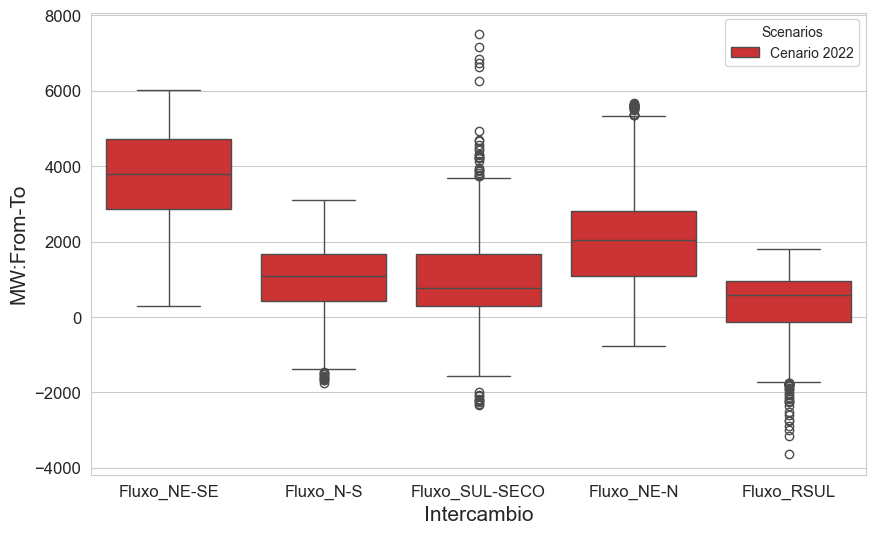

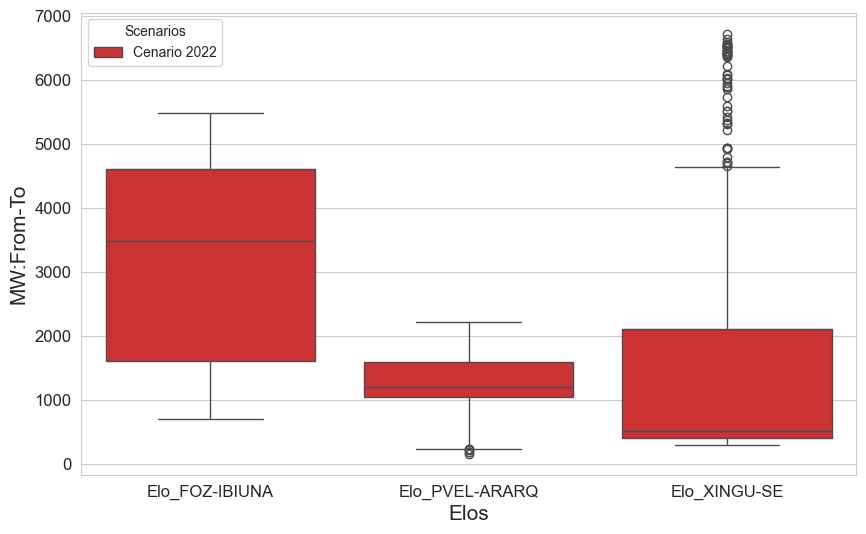

In [46]:
if Analise_Inter_HVDC:
    df_1 = df_intercambios_01.reset_index()
    df_1 = df_1[df_1['Intercambio']!='EXP_NE']
    boxplot_HVDC_interc(df_1, 'Intercambio', 'MW:From-To' , '', 'Intercambio', 'MW:From-To', ylim = None)
    boxplot_HVDC_interc(df_hvdc_01[df_hvdc_01['Nome Elo']!='Elo_CPVBTB-PVEL'], 'Elo', ' P(MW)' , '', 'Elos', 'MW:From-To', ylim = None)

In [47]:
df_intercambios_01.index.get_level_values('Intercambio').unique()

Index(['EXP_NE', 'Fluxo_NE-SE', 'Fluxo_N-S', 'Fluxo_SUL-SECO', 'Fluxo_NE-N',
       'Fluxo_RSUL'],
      dtype='object', name='Intercambio')

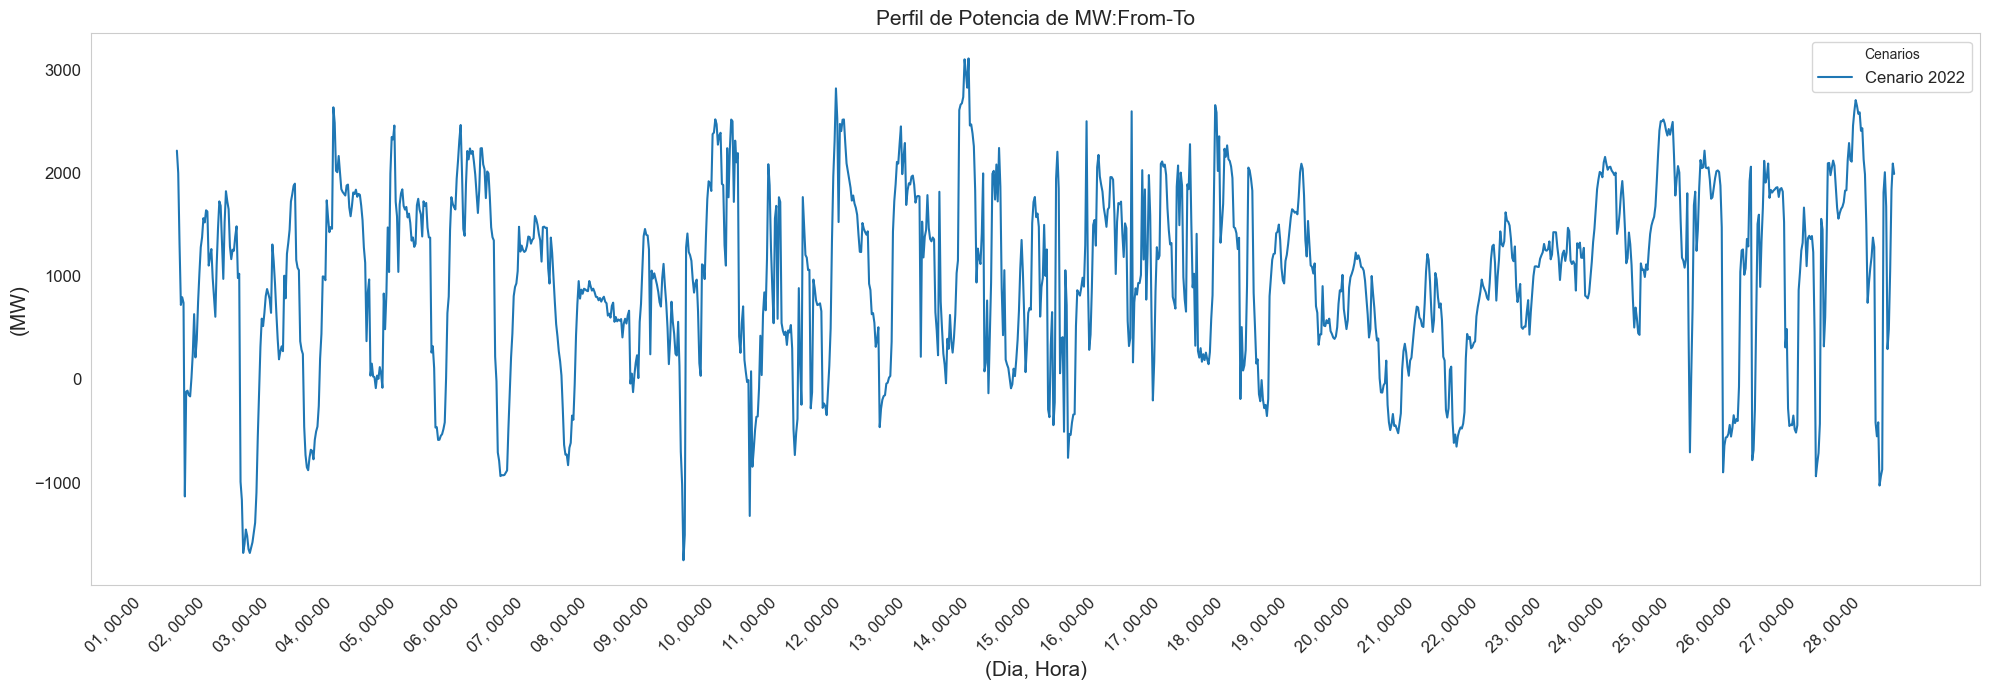

In [48]:
plot_potencia_perfil(df_resultado, df_intercambios_01.loc[:,:,:,'Fluxo_N-S'], 'MW:From-To', markers=False)

In [49]:
df_hvdc_01.index.get_level_values('Elo').unique()

Index(['Elo_FOZ-IBIUNA', 'Elo_PVEL-ARARQ', 'Elo_CPVBTB-PVEL', 'Elo_XINGU-SE'], dtype='object', name='Elo')

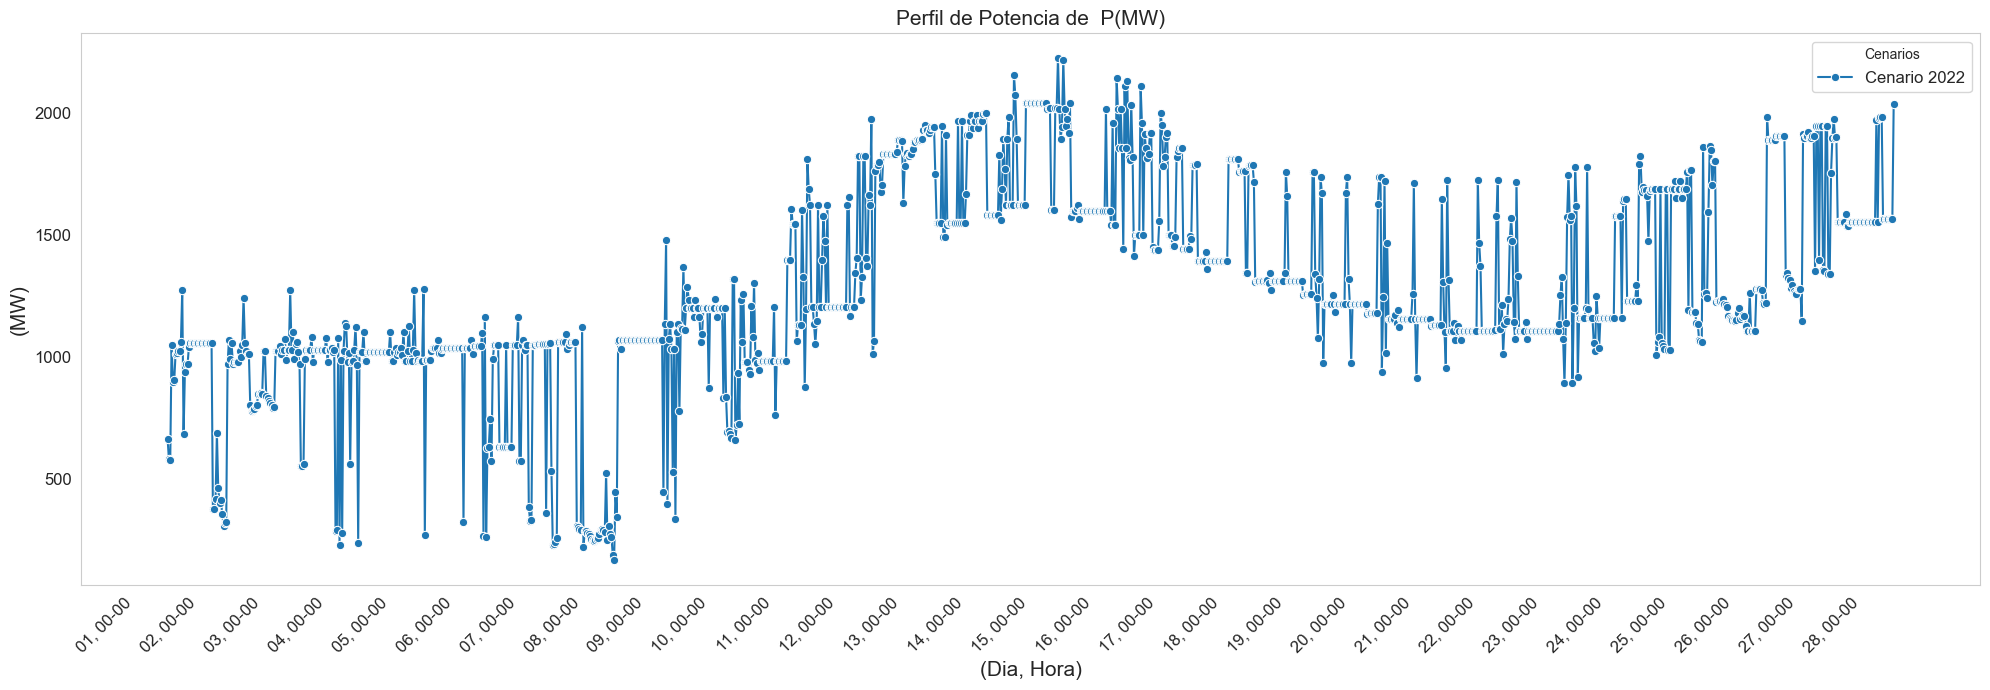

In [50]:
plot_potencia_perfil(df_resultado, df_hvdc_01.loc[:,:,:,'Elo_PVEL-ARARQ'], ' P(MW)', markers=True)

## Comparação Fluxos

In [57]:
start_column = 1  # Second column (index 1)
start_row = 1  # Second row (index 1)
# fluxoONS = pd.read_excel("C:/Users/David/OneDrive/Documents/FERV_documentos/Dados Intercambios ONS/Fluxos RSUL_HVDC Itaipu_HVDC Madeira_1.xlsx", header=1, sheet_name ='FLUXOS')
fluxoONS = pd.read_csv("C:/Users/David/OneDrive/Documents/FERV_documentos/fluxo_intercambio_NORUS_2022/fluxo_intercambio/fluxo_intercambio_FNS.csv", sep=';')
# fluxoONS = pd.read_csv("C:/Users/David/OneDrive/Documents/FERV_documentos/fluxo_intercambio_NORUS_2026_V1A1F2_FNS_lim/fluxo_intercambio_FNS.csv", sep=';')



# fluxoONS = fluxoONS.drop(fluxoONS.columns[0], axis=1)
# fluxoONS = fluxoONS.rename(columns={'SME_S_FX_RSUL_MW.v': 'Fluxo_RSUL_ONS', 'PSU_BRIT50_MW.v': 'HVDC_ITAIPU_ONS', 'ROCPV_FX_ELOCC_MW.v': 'HVDC_MADEIRA_ONS'})
# fluxoONS['Hora'] = fluxoONS['Hora'].astype(str)
# fluxoONS['Hora'] = fluxoONS['Hora'].str.zfill(2) + '-00'
# fluxoONS = fluxoONS[fluxoONS['Dia']<29]
# fluxoONS = fluxoONS.melt(id_vars=['Dia','Hora'], value_vars=['Fluxo_RSUL_ONS','HVDC_ITAIPU_ONS','HVDC_MADEIRA_ONS'], var_name='Intercambio', value_name='(MW)').set_index(['Dia','Hora','Intercambio'])


fluxoONS = fluxoONS.drop(fluxoONS.columns[0], axis=1)
fluxoONS = fluxoONS.drop(fluxoONS.columns[0], axis=1)
fluxoONS = fluxoONS.rename(columns={'periodo': 'Dia', 'hora': 'Hora', 'MW':'Fluxo_N-S_DESSEM'})
fluxoONS['Hora'] = fluxoONS['Hora'].str.replace(':','-')
fluxoONS['Dia'] = fluxoONS['Dia'].str.slice(0, 2)
fluxoONS = fluxoONS.melt(id_vars=['Dia','Hora'], value_vars='Fluxo_N-S_DESSEMS', var_name='Intercambio', value_name='(MW)').set_index(['Dia','Hora','Intercambio'])


df_intercambios = pd.concat(dfs['intercambios'], axis=0)
df_intercambios.rename(columns={'Unnamed: 0': 'Intercambio'}, inplace=True)
df_intercambios['Dia'] = df_intercambios['Dia'].astype(str)
df_intercambios['Dia'] = df_intercambios['Dia'].str.zfill(2)
df_intercambios_01 = df_intercambios.set_index(['Dia','Hora','Intercambio'])

df_HVDC = pd.concat(dfs['HVDC'], axis=0)
df_HVDC.rename(columns={'Unnamed: 0': 'Intercambio'}, inplace=True)
df_HVDC['Dia'] = df_HVDC['Dia'].astype(str)
df_HVDC['Dia'] = df_HVDC['Dia'].str.zfill(2)
df_hvdc_01 = df_HVDC.set_index(['Dia','Hora','Intercambio'])

intercambio_previsto_ac = df_intercambios_01[['MW:From-To']]
intercambio_previsto_ac = intercambio_previsto_ac.rename(columns={'MW:From-To': '(MW)'})
intercambio_previsto_dc = df_hvdc_01[[' P(MW)']]
intercambio_previsto_dc = intercambio_previsto_dc.rename(columns={' P(MW)': '(MW)'})
intercambio_previsto = pd.concat([intercambio_previsto_ac[['(MW)']],intercambio_previsto_dc[['(MW)']]],axis = 0)


# condition = intercambio_previsto.index.get_level_values('Hora').str.endswith('00')
# intercambio_previsto = intercambio_previsto.loc[:,condition,:]

df_compare_fluxs = pd.concat([fluxoONS,intercambio_previsto],axis = 0).reset_index()
df_compare_fluxs['Dia'] = df_compare_fluxs['Dia'].astype(str)
df_compare_fluxs['Dia_Hora'] = '(' + df_compare_fluxs['Dia'] + ', ' + df_compare_fluxs['Hora'] + ')'

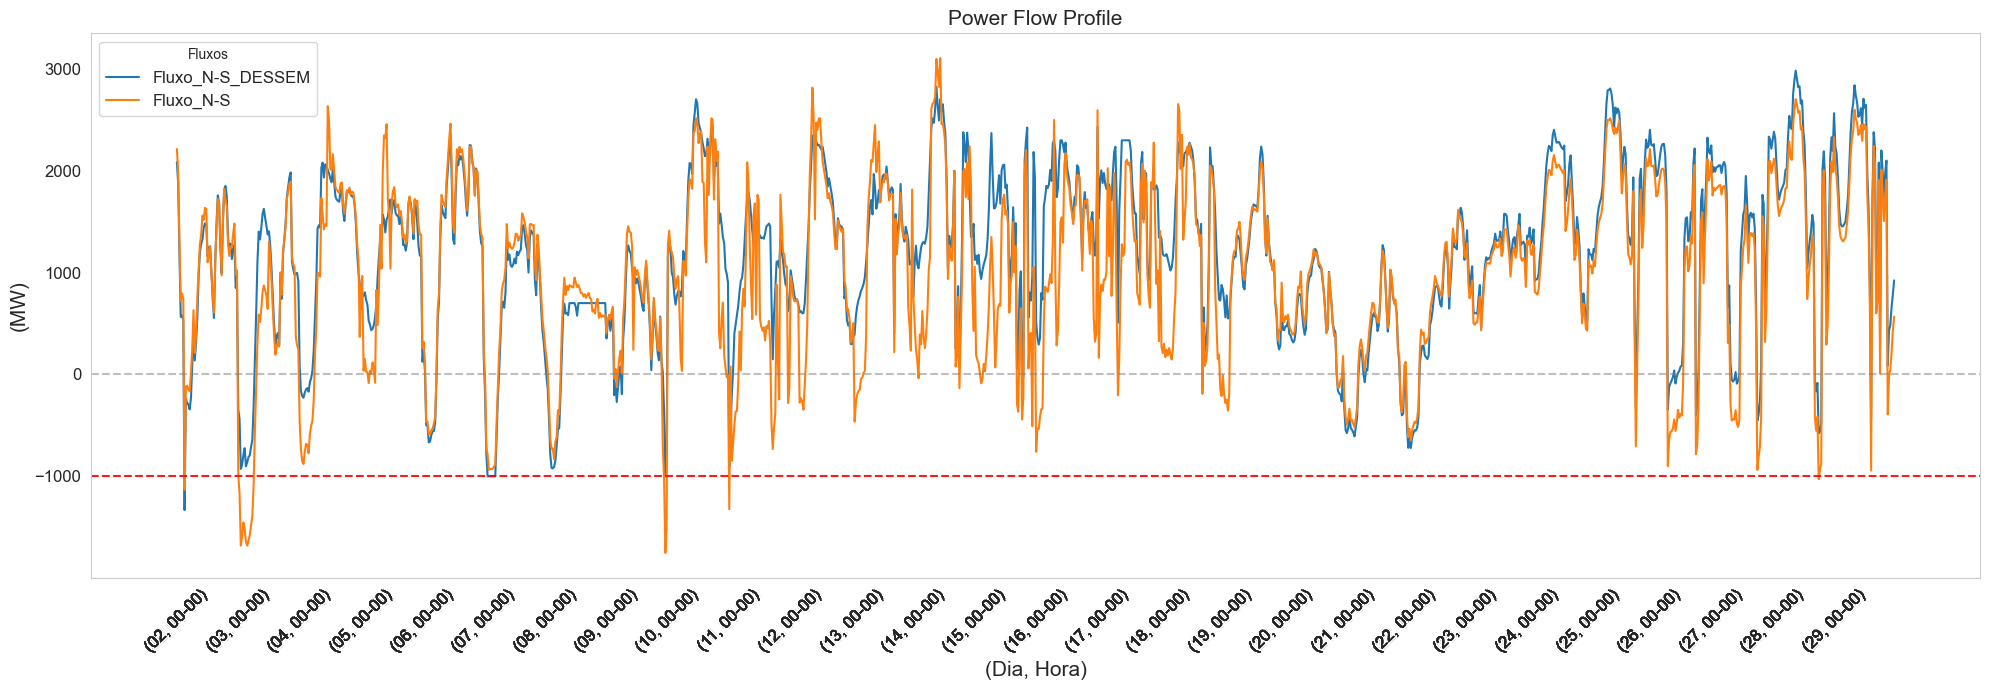

In [58]:
df = df_compare_fluxs
condition = df['Intercambio'].isin(['Fluxo_N-S','Fluxo_N-S_DESSEM'])

# Plotting
plt.figure(figsize=(20, 7))
# sns.lineplot(data=F_ONS_melted, x='Dia_Hora', y='value', hue='Fluxos', style='Fluxos', markers=True)
sns.lineplot(data=df[condition], x='Dia_Hora', y='(MW)', hue='Intercambio', style=None, markers=False)
plt.xlabel('(Dia, Hora)', fontsize = 15)
plt.ylabel('(MW)', fontsize = 15)
plt.title('Power Flow Profile', fontsize = 15)
# Select only some ticks for display
value = int(df['Dia_Hora'].unique().shape[0]/28)
selected_ticks = df['Dia_Hora'].iloc[::value]  # Change the step value as needed
plt.xticks(selected_ticks, rotation=45, fontsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.legend(title='Fluxos', fontsize = 12)
# Agregar la línea horizontal en el valor cero del eje y
plt.axhline(0, color='gray', linestyle='--' ,  alpha=0.5)
plt.axhline(-1000, color='red', linestyle='--' ,  alpha=0.9)

plt.tight_layout()
plt.grid()
plt.show()

In [59]:
# # Plotting
# plt.figure(figsize=(20, 7))
# sns.lineplot(data=df, x='Hora', y='(MW)', hue='Intercambio', style='Intercambio', markers=True)
# plt.xlabel('(Dia, Hora)', fontsize = 15)
# plt.ylabel('(MW)', fontsize = 15)
# plt.title('Power Flow Profile', fontsize = 15)
# # Select only some ticks for display
# value = int(df['Dia_Hora'].unique().shape[0]/28)
# selected_ticks = df['Dia_Hora'].iloc[::value]  # Change the step value as needed
# plt.xticks(selected_ticks, rotation=45, fontsize=12)
# plt.tick_params(axis='y', labelsize=12)
# plt.legend(title='Fluxos', fontsize = 12)
# # Agregar la línea horizontal en el valor cero del eje y
# plt.axhline(0, color='blue', linestyle='--' ,  alpha=0.9)

# Avaliação casos em ALARME:

In [60]:
# plot_indice_perfil(df_resultado, df_data_completo.loc[:,:,'Sul',:],'UV DPI_PV', markers=False)
# plot_potencia_perfil_2(df_resultado, df_data_completo.loc[:,:,'Sul',:], 'PG_MW','PL_MW', markers=False,ylim=[8000,30000], ylim2=[8000,30000])
# plot_potencia_perfil_2(df_resultado,  df_data_completo.loc[:,:,'Sul',:], 'PG_MW','UV DPI_PV', markers=False)
# scatterplot(df_data_completo.loc[:,:,'Sul',:], 'PL_MW', 'PG_MW', 'UV DPI_PV', )

# Filtragem das linhas com carregamento acima de 100%

In [61]:
# conjunto_sobrecarga = [(i[0],i[1],i[3])  for i in df_data_completo[df_data_completo['% L1_500down']>100].index]
# filtro_s = (df_data_completo.index.to_frame()[['Dia', 'Hora','Cenario']].apply(tuple, axis=1).isin(conjunto_sobrecarga))

# boxplot_linhas(df_data_completo[~filtro_s], 'REG', '% L1_500up' , 'Boxplot Carregamento das linhas AC 500up', 'Region', 'Line Loading (%)', ylim = None)
# boxplot_linhas(df_data_completo[~filtro_s], 'REG', 'Mvar:Losses_500up' , 'Boxplot Perdas Reativas das linhas AC 500up', 'Region', 'Losses (MVAR)', ylim = None)
# boxplot_linhas(df_data_completo[~filtro_s], 'REG', '% L1_500down' , 'Boxplot Carregamento das linhas AC 500down', 'Region', 'Line Loading (%)', )
# boxplot_linhas(df_data_completo[~filtro_s], 'REG', 'Mvar:Losses_500down' , 'Boxplot Perdas Reativas das linhas AC 500down', 'Region', 'Losses (MVAR)', ylim = None)

In [62]:
# DFFL = df_linhas[(df_linhas['VBASEKV'].isin([230, 345, 440,])) & (df_linhas['REG']=='AC-RO')]
# filtro_sL = (DFFL[['Dia', 'Hora','Cenario']].apply(tuple, axis=1).isin(conjunto_sobrecarga))
# set(DFFL[filtro_sL][['From Name', 'To Name']].apply(tuple, axis=1).values)

## Tensão nas barras com carregamento elevado para as distintas regiões ==================
'''
mask_inseguros = conjunto_sobrecarga
filtro1 = (df_ger[['Dia', 'Hora', 'Cenario']].apply(tuple, axis=1).isin(mask_inseguros))
df_filt_ger = df_ger[filtro1]
filtro2 = (df_nt[['Dia', 'Hora', 'Cenario']].apply(tuple, axis=1).isin(mask_inseguros))
df_filt_nt = df_nt[filtro2]
df_complete = pd.concat([df_filt_nt, df_filt_ger], axis=0)
boxplot_voltage(df_complete, clase = "REG", titulo = 'Distribução das tensões', xlbl = 'Region')
'''

'\nmask_inseguros = conjunto_sobrecarga\nfiltro1 = (df_ger[[\'Dia\', \'Hora\', \'Cenario\']].apply(tuple, axis=1).isin(mask_inseguros))\ndf_filt_ger = df_ger[filtro1]\nfiltro2 = (df_nt[[\'Dia\', \'Hora\', \'Cenario\']].apply(tuple, axis=1).isin(mask_inseguros))\ndf_filt_nt = df_nt[filtro2]\ndf_complete = pd.concat([df_filt_nt, df_filt_ger], axis=0)\nboxplot_voltage(df_complete, clase = "REG", titulo = \'Distribução das tensões\', xlbl = \'Region\')\n'